In [1]:
# import modules
import panel as pn
pn.extension('tabulator')
import pandas as pd
import numpy as np
from panel.template import FastListTemplate
from pathlib import Path
from yahoo_fin.stock_info import get_data
import datetime
from matplotlib.figure import Figure
from matplotlib import cm
%matplotlib inline
import hvplot.pandas
import holoviews as hv
from holoviews import opts

# import modules that help build tabs
import modules.helpers as helpers
import modules.HistoricalData as hst
import modules.MCTab as MCTab
import modules.intro as intro
import modules.profile as prf
import modules.algorithmic_functions as af
import modules.AlgoTab as at

import pandas_ta as ta
import yfinance as yf
import datetime


In [46]:
df_conservative = pd.read_csv(Path(f"./data/performance/performance_data_rsi_conservative.csv"),
                 index_col='index', parse_dates=True, infer_datetime_format=True)

df_balanced = pd.read_csv(Path(f"./data/performance/performance_data_macd_balanced.csv"),
                 index_col='index', parse_dates=True, infer_datetime_format=True)

df_growth = pd.read_csv(Path(f"./data/performance/performance_data_macd_growth.csv"),
                 index_col='index', parse_dates=True, infer_datetime_format=True)

df_aggressive = pd.read_csv(Path(f"./data/performance/performance_data_macd_aggressive.csv"),
                 index_col='index', parse_dates=True, infer_datetime_format=True)

df_alternative = pd.read_csv(Path(f"./data/performance/performance_data_macd_alternative.csv"),
                 index_col='index', parse_dates=True, infer_datetime_format=True)

In [47]:
display(df_conservative.tail())
display(df_balanced.tail())
display(df_growth.tail())
display(df_aggressive.tail())
display(df_alternative.tail())

,close,RSI_signal,Position,Entry/Exit Position,Portfolio Holdings,Portfolio Cash,Portfolio Total,Portfolio Daily Returns,Portfolio Cumulative Returns
index,,,,,,,,,
2023-03-31,63.144998,0,650,0.0,41044.248562,103516.611609,144560.860171,0.002470,-0.036261
2023-04-03,63.086001,0,650,0.0,41005.900660,103516.611609,144522.512269,-0.000265,-0.036517
2023-04-04,62.960001,0,650,0.0,40924.000583,103516.611609,144440.612192,-0.000567,-0.037063
2023-04-05,62.698999,0,650,0.0,40754.349241,103516.611609,144270.960851,-0.001175,-0.038194
2023-04-06,62.830000,0,650,0.0,40839.500198,103516.611609,144356.111808,0.000590,-0.037626


,close,MACD_signal,Position,Entry/Exit Position,Portfolio Holdings,Portfolio Cash,Portfolio Total,Portfolio Daily Returns,Portfolio Cumulative Returns
index,,,,,,,,,
2023-03-31,215.082995,1,400,0.0,86033.198090,60037.043533,146070.241623,0.006949,-0.026198
2023-04-03,215.710005,1,400,0.0,86284.001846,60037.043533,146321.045380,0.001717,-0.024526
2023-04-04,215.141996,1,400,0.0,86056.798515,60037.043533,146093.842049,-0.001553,-0.026041
2023-04-05,214.866997,1,400,0.0,85946.798935,60037.043533,145983.842468,-0.000753,-0.026774
2023-04-06,215.470004,1,400,0.0,86188.001404,60037.043533,146225.044937,0.001652,-0.025166


,close,MACD_signal,Position,Entry/Exit Position,Portfolio Holdings,Portfolio Cash,Portfolio Total,Portfolio Daily Returns,Portfolio Cumulative Returns
index,,,,,,,,,
2023-03-31,107.451996,1,800,0.0,85961.596985,57418.48259,143380.079575,0.007862,-0.044133
2023-04-03,107.336003,1,800,0.0,85868.802185,57418.48259,143287.284775,-0.000647,-0.044751
2023-04-04,106.836002,1,800,0.0,85468.801346,57418.48259,142887.283936,-0.002792,-0.047418
2023-04-05,105.864997,1,800,0.0,84691.997833,57418.48259,142110.480423,-0.005436,-0.052597
2023-04-06,106.375004,1,800,0.0,85100.003052,57418.48259,142518.485641,0.002871,-0.049877


,close,MACD_signal,Position,Entry/Exit Position,Portfolio Holdings,Portfolio Cash,Portfolio Total,Portfolio Daily Returns,Portfolio Cumulative Returns
index,,,,,,,,,
2023-03-31,119.469496,1,700,0.0,83628.647308,59974.509254,143603.156562,0.008044,-0.042646
2023-04-03,119.319503,1,700,0.0,83523.652248,59974.509254,143498.161502,-0.000731,-0.043346
2023-04-04,118.759002,1,700,0.0,83131.301179,59974.509254,143105.810432,-0.002734,-0.045961
2023-04-05,117.619997,1,700,0.0,82333.997984,59974.509254,142308.507237,-0.005571,-0.051277
2023-04-06,118.222505,1,700,0.0,82755.753365,59974.509254,142730.262618,0.002964,-0.048465


,close,MACD_signal,Position,Entry/Exit Position,Portfolio Holdings,Portfolio Cash,Portfolio Total,Portfolio Daily Returns,Portfolio Cumulative Returns
index,,,,,,,,,
2023-03-31,97.813998,1,800,0.0,78251.198502,68446.279984,146697.478485,0.008173,-0.022017
2023-04-03,97.666501,1,800,0.0,78133.201141,68446.279984,146579.481125,-0.000804,-0.022803
2023-04-04,97.240501,1,800,0.0,77792.400818,68446.279984,146238.680801,-0.002325,-0.025075
2023-04-05,96.420498,1,800,0.0,77136.398010,68446.279984,145582.677994,-0.004486,-0.029449
2023-04-06,96.996503,1,800,0.0,77597.202530,68446.279984,146043.482513,0.003165,-0.026377


In [42]:
display(df_aggressive.head())
display(df_alternative.head())
display(df_aggressive.tail())
display(df_alternative.tail())

,close,MACD_signal,Position,Entry/Exit Position,Portfolio Holdings,Portfolio Cash,Portfolio Total,Portfolio Daily Returns,Portfolio Cumulative Returns
index,,,,,,,,,
2022-01-10,131.489505,0,350,0.0,46021.326718,104539.373732,150560.700450,-0.000171,0.003738
2022-01-11,133.128998,0,350,0.0,46595.149264,104539.373732,151134.522996,0.003811,0.007563
2022-01-12,133.885004,0,350,0.0,46859.751348,104539.373732,151399.125080,0.001751,0.009328
2022-01-13,130.567496,0,350,0.0,45698.623772,104539.373732,150237.997503,-0.007669,0.001587
2022-01-14,131.578996,0,350,0.0,46052.648664,104539.373732,150592.022395,0.002356,0.003947


,close,MACD_signal,Position,Entry/Exit Position,Portfolio Holdings,Portfolio Cash,Portfolio Total,Portfolio Daily Returns,Portfolio Cumulative Returns
index,,,,,,,,,
2022-01-10,112.398503,0,400,0.0,44959.401283,104932.997894,149892.399178,-0.000247,-0.000717
2022-01-11,113.615998,0,400,0.0,45446.399117,104932.997894,150379.397011,0.003249,0.002529
2022-01-12,114.248503,0,400,0.0,45699.401131,104932.997894,150632.399025,0.001682,0.004216
2022-01-13,111.917997,0,400,0.0,44767.198677,104932.997894,149700.196571,-0.006189,-0.001999
2022-01-14,112.533498,0,400,0.0,45013.399277,104932.997894,149946.397171,0.001645,-0.000357


,close,MACD_signal,Position,Entry/Exit Position,Portfolio Holdings,Portfolio Cash,Portfolio Total,Portfolio Daily Returns,Portfolio Cumulative Returns
index,,,,,,,,,
2023-03-31,119.469496,1,700,0.0,83628.647308,59974.509254,143603.156562,0.008044,-0.042646
2023-04-03,119.319503,1,700,0.0,83523.652248,59974.509254,143498.161502,-0.000731,-0.043346
2023-04-04,118.759002,1,700,0.0,83131.301179,59974.509254,143105.810432,-0.002734,-0.045961
2023-04-05,117.619997,1,700,0.0,82333.997984,59974.509254,142308.507237,-0.005571,-0.051277
2023-04-06,118.222505,1,700,0.0,82755.753365,59974.509254,142730.262618,0.002964,-0.048465


,close,MACD_signal,Position,Entry/Exit Position,Portfolio Holdings,Portfolio Cash,Portfolio Total,Portfolio Daily Returns,Portfolio Cumulative Returns
index,,,,,,,,,
2023-03-31,97.813998,1,800,0.0,78251.198502,68446.279984,146697.478485,0.008173,-0.022017
2023-04-03,97.666501,1,800,0.0,78133.201141,68446.279984,146579.481125,-0.000804,-0.022803
2023-04-04,97.240501,1,800,0.0,77792.400818,68446.279984,146238.680801,-0.002325,-0.025075
2023-04-05,96.420498,1,800,0.0,77136.398010,68446.279984,145582.677994,-0.004486,-0.029449
2023-04-06,96.996503,1,800,0.0,77597.202530,68446.279984,146043.482513,0.003165,-0.026377


In [44]:
df_aggressive[df_aggressive['Entry/Exit Position'] != 0]

,close,MACD_signal,Position,Entry/Exit Position,Portfolio Holdings,Portfolio Cash,Portfolio Total,Portfolio Daily Returns,Portfolio Cumulative Returns
index,,,,,,,,,
2022-02-01,128.733500,1,700,350.0,90113.449802,59482.648830,149596.098633,0.000733,-0.002693
2022-02-18,121.972502,0,350,-350.0,42690.375547,102173.024378,144863.399925,-0.005904,-0.034244
2022-03-02,124.148046,1,700,350.0,86903.632078,58721.208339,145624.840417,0.005526,-0.029168
2022-03-07,117.051003,0,350,-350.0,40967.850976,99689.059315,140656.910291,-0.017709,-0.062287
2022-03-16,121.096500,1,700,350.0,84767.549744,57305.284443,142072.834187,0.008702,-0.052848
2022-04-07,124.335005,0,350,-350.0,43517.251782,100822.536225,144339.788008,0.000964,-0.037735
2022-05-04,120.375996,1,700,350.0,84263.197546,58690.937452,142954.134998,0.009959,-0.046972
2022-05-05,114.874505,0,350,-350.0,40206.076632,98897.014084,139103.090715,-0.026939,-0.072646
2022-05-25,108.300997,1,700,350.0,75810.697746,60991.665211,136802.362957,0.002971,-0.087984


In [18]:
def create_performance_data():
    classes = ['conservative', 'balanced', 'growth', 'aggressive', 'alternative']
    strategies_list = {'conservative': ['sma', 'rsi', 'macd'],
              'balanced': ['sma', 'rsi', 'macd'],
              'growth': ['sma', 'rsi', 'macd'],
              'aggressive': ['sma', 'rsi', 'macd'],
              'alternative': ['sma', 'rsi', 'macd']
             }
    for c in classes:
        start_date = af.default_test_start_date
        df, ml = af.build_portfolio_signal_ml_df(c, 2021, 6, 1)
        share_size = af.default_share_size[c]

        strategies = strategies_list[c]
        for s in strategies:
            ind = s.upper() + '_signal'
            performance = af.create_portfolio_performance_data(df, ind, share_size=share_size)
            performance = performance[['close', ind, 'Position', 'Entry/Exit Position', 'Portfolio Holdings', 'Portfolio Cash',
                                      'Portfolio Total', 'Portfolio Daily Returns', 'Portfolio Cumulative Returns']].loc[start_date:,]
            performance.reset_index(inplace=True)
            file_name = f"performance_data_{s}_{c}.csv"
            file_path = Path(f"../data/performance/{file_name}")
            # performance.to_csv(file_path, index=False)
            print(performance.head())

In [19]:
create_performance_data()

       index      close  SMA_signal  Position  Entry/Exit Position  \
0 2022-01-10  70.838001           1       650                  0.0   
1 2022-01-11  71.367999           1       650                  0.0   
2 2022-01-12  71.652001           1       650                  0.0   
3 2022-01-13  70.680999           1       650                  0.0   
4 2022-01-14  70.871999           1       650                  0.0   

   Portfolio Holdings  Portfolio Cash  Portfolio Total  \
0        46044.700689        100000.0    146044.700689   
1        46389.199524        100000.0    146389.199524   
2        46573.800650        100000.0    146573.800650   
3        45942.649345        100000.0    145942.649345   
4        46066.799459        100000.0    146066.799459   

   Portfolio Daily Returns  Portfolio Cumulative Returns  
0                -0.000336                     -0.007777  
1                 0.002359                     -0.005436  
2                 0.001261                     -0.004

In [3]:
df,_ = af.build_portfolio_signal_ml_df('conservative', 2017,12,31)

In [4]:
df.head()

,open,high,low,close,adjclose,volume,SMA_30,SMA_100,MACD_12_26_9,MACDh_12_26_9,...,CUMLOGRET_1,LOGRET_1,CUMPCTRET_1,PCTRET_1,performance_signal,SMA_signal,MACD_signal,BB_signal,RSI_signal,STOCH_signal
2019-01-08,46.757499,46.845000,46.570000,46.754999,43.114615,3488140.0,47.279233,48.544915,-0.359261,0.029105,...,-0.057334,0.001862,-0.055722,0.001864,1,0,1,0,0,0
2019-01-09,46.850501,47.049999,46.791999,46.917001,43.267744,3751780.0,47.265800,48.518945,-0.315848,0.058014,...,-0.053875,0.003459,-0.052450,0.003465,1,0,1,0,0,0
2019-01-10,46.831501,47.007000,46.710001,46.940001,43.287138,4096000.0,47.244500,48.492925,-0.276401,0.077969,...,-0.053385,0.000490,-0.051985,0.000490,1,0,1,0,0,0
2019-01-11,46.942999,47.010999,46.843999,46.953000,43.297765,2361140.0,47.221333,48.466965,-0.241309,0.090449,...,-0.053108,0.000277,-0.051723,0.000277,1,0,1,0,0,0
2019-01-14,46.863500,46.954000,46.769000,46.854000,43.203979,2511090.0,47.177133,48.440085,-0.218962,0.090237,...,-0.055219,-0.002111,-0.053722,-0.002108,0,0,1,0,0,0


In [12]:
def create_portfolio_performance_data(df, signal, initial_capital=100000, share_size=500):
    
    
    df['Position'] = (share_size * df[signal]) + share_size


    # Determine the points in time where shares are bought or sold
    df['Entry/Exit Position'] = df['Position'].diff()
    df.loc[df.index[0],'Entry/Exit Position'] = df.loc[df.index[0],'Position']


    # Multiply the close price by the number of shares held, or the Position
    df['Portfolio Holdings'] = df['close'] * df['Position']

    # Subtract the amount of either the cost or proceeds of the trade from the initial capital invested
    df['Portfolio Cash'] = initial_capital - (df['close'] * df['Entry/Exit Position']).cumsum()

    # Calculate the total portfolio value by adding the portfolio cash to the portfolio holdings (or investments)
    df['Portfolio Total'] = df['Portfolio Cash'] + df['Portfolio Holdings']

    # Calculate the portfolio daily returns
    df['Portfolio Daily Returns'] = df['Portfolio Total'].pct_change()

    # Calculate the portfolio cumulative returns
    df['Portfolio Cumulative Returns'] = (1 + df['Portfolio Daily Returns']).cumprod() - 1

    # return dataframe
    return df

In [17]:
create_portfolio_performance_data(df, 'SMA_signal').tail()#.loc['2019-2-25':'2019-2-26',]

,open,high,low,close,adjclose,volume,SMA_30,SMA_100,MACD_12_26_9,MACDh_12_26_9,...,BB_signal,RSI_signal,STOCH_signal,Position,Entry/Exit Position,Portfolio Holdings,Portfolio Cash,Portfolio Total,Portfolio Daily Returns,Portfolio Cumulative Returns
2023-03-31,62.564499,63.202998,62.499998,63.144998,63.101796,2914240.0,60.448334,58.937388,0.799553,0.149089,...,0,0,0,1000,0.0,63144.997787,49599.602485,112744.600272,0.004884,0.127446
2023-04-03,62.863999,63.174999,62.645000,63.086001,63.086001,5312600.0,60.553500,59.008498,0.835746,0.148225,...,0,0,0,1000,0.0,63086.001015,49599.602485,112685.603499,-0.000523,0.126856
2023-04-04,62.999001,63.307998,62.644001,62.960001,62.960001,3638910.0,60.685700,59.076084,0.844526,0.125605,...,0,0,0,1000,0.0,62960.000896,49599.602485,112559.603381,-0.001118,0.125596
2023-04-05,62.854499,62.991000,62.411001,62.698999,62.698999,3245690.0,60.810500,59.147709,0.820961,0.081631,...,0,0,0,1000,0.0,62698.998833,49599.602485,112298.601317,-0.002319,0.122986
2023-04-06,62.462499,62.929000,62.273998,62.830000,62.830000,4343490.0,60.920367,59.195529,0.803592,0.051410,...,0,0,0,1000,0.0,62830.000305,49599.602485,112429.602790,0.001167,0.124296


In [125]:
display(df_conservative['close'].max())
display(df_balanced['close'].max())
display(df_growth['close'].max())
display(df_aggressive['close'].max())
display(df_alternative['close'].max())

71.65200099945068

245.19999446868897

120.0080032348633

133.88500385284422

114.24850282669068

In [27]:
(a or b).any()

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [28]:
(df['RSI_14'] > 70) | (df['RSI_14'] < 30)

2019-01-08    False
2019-01-09    False
2019-01-10    False
2019-01-11    False
2019-01-14    False
              ...  
2023-03-31     True
2023-04-03     True
2023-04-04    False
2023-04-05    False
2023-04-06    False
Name: RSI_14, Length: 1070, dtype: bool

In [29]:
df[(df['RSI_14'] > 70) | (df['RSI_14'] < 30)]

,open,high,low,close,adjclose,volume,SMA_30,SMA_100,MACD_12_26_9,MACDh_12_26_9,...,STOCHd_14_3_3,CUMLOGRET_1,LOGRET_1,CUMPCTRET_1,PCTRET_1,performance_signal,SMA_signal,MACD_signal,BB_signal,RSI_signal
2019-02-15,48.596000,48.635999,48.501001,48.603001,44.884085,2373600.0,47.594450,47.991210,0.337222,0.057486,...,92.735703,-0.018570,0.002286,-0.018399,0.002289,1,0,1,0,0
2019-02-19,48.621499,48.773999,48.606999,48.706000,44.984056,3004730.0,47.664683,47.980990,0.351020,0.057027,...,93.946209,-0.016453,0.002117,-0.016319,0.002119,1,0,1,0,0
2019-02-20,48.705999,48.831001,48.617999,48.746001,45.022230,2886250.0,47.733950,47.971850,0.361021,0.053622,...,94.490875,-0.015632,0.000821,-0.015511,0.000821,1,0,1,0,0
2019-02-21,48.677500,48.804001,48.592001,48.720999,44.997534,2658770.0,47.799483,47.962500,0.362747,0.044279,...,94.079853,-0.016145,-0.000513,-0.016016,-0.000513,0,0,1,0,0
2019-02-22,48.831499,48.983999,48.799000,48.957999,45.222713,3324180.0,47.867517,47.954640,0.378872,0.048323,...,93.375980,-0.011293,0.004853,-0.011229,0.004864,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-29,55.875000,55.999000,55.189999,55.549001,55.088970,4960130.0,59.081740,60.203345,-1.320562,-0.171912,...,7.837771,0.115010,-0.015097,0.121885,-0.014984,0,0,0,0,1
2022-09-30,55.562000,56.059001,55.064999,55.184999,54.726254,4834740.0,58.799473,60.143401,-1.364406,-0.172605,...,9.220952,0.108436,-0.006574,0.114533,-0.006553,0,0,0,0,1
2023-02-02,60.925499,61.515998,60.714000,61.236001,61.093339,4252460.0,57.743900,57.324197,0.791508,0.241108,...,85.235632,0.212480,0.016747,0.236741,0.016888,1,1,1,0,0
2023-03-31,62.564499,63.202998,62.499998,63.144998,63.101796,2914240.0,60.448334,58.937388,0.799553,0.149089,...,87.124558,0.243178,0.008716,0.275296,0.008754,1,1,1,0,0


In [11]:
df.columns

Index(['open', 'high', 'low', 'close', 'adjclose', 'volume', 'SMA_30',
       'SMA_100', 'MACD_12_26_9', 'MACDh_12_26_9', 'MACDs_12_26_9',
       'BBL_20_2.0', 'BBM_20_2.0', 'BBU_20_2.0', 'BBB_20_2.0', 'BBP_20_2.0',
       'RSI_14', 'HLC3', 'OHLC4', 'LR_14', 'STOCHk_14_3_3', 'STOCHd_14_3_3',
       'CUMLOGRET_1', 'LOGRET_1', 'CUMPCTRET_1', 'PCTRET_1',
       'performance_signal', 'SMA_signal', 'MACD_signal', 'BB_signal',
       'RSI_signal'],
      dtype='object')

In [30]:
df[['open','high', 'low', 'close', 'OHLC4']]

,open,high,low,close,OHLC4
2019-01-08,46.757499,46.845000,46.570000,46.754999,46.731875
2019-01-09,46.850501,47.049999,46.791999,46.917001,46.902375
2019-01-10,46.831501,47.007000,46.710001,46.940001,46.872126
2019-01-11,46.942999,47.010999,46.843999,46.953000,46.937749
2019-01-14,46.863500,46.954000,46.769000,46.854000,46.860125
...,...,...,...,...,...
2023-03-31,62.564499,63.202998,62.499998,63.144998,62.853123
2023-04-03,62.863999,63.174999,62.645000,63.086001,62.942500
2023-04-04,62.999001,63.307998,62.644001,62.960001,62.977750
2023-04-05,62.854499,62.991000,62.411001,62.698999,62.738875


In [58]:
market = helpers.get_stocks(['^GSPC'])
market = market['^GSPC']
market['market_daily_returns'] = market['close'].pct_change()
market.dropna(inplace=True)
market['market_cum_returns'] = (1 + market['market_daily_returns']).cumprod() - 1
market = market.loc[af.default_test_start_date:,]
market.reset_index(inplace=True)

In [115]:
market = pd.read_csv(Path(f"./data/at_market_data.csv"),
                 index_col='index', parse_dates=True, infer_datetime_format=True) 
df = pd.read_csv(Path(f"./data/performance/performance_data_macd_aggressive.csv"),
                 index_col='index', parse_dates=True, infer_datetime_format=True)

In [116]:
# df = df[df['Portfolio Holdings'] > 0]

In [117]:
# df['holdings_daily_returns'] = df['Portfolio Holdings'].pct_change()
df['daily_returns'] = df['close'].pct_change()
df['cum_returns'] = (1 + df['daily_returns']).cumprod() - 1
df.dropna(inplace=True)
display(df.head())
# df['holdings_cum_returns'] = (1 + df['holdings_daily_returns']).cumprod() - 1

display(df.tail())

,close,MACD_signal,Position,Entry/Exit Position,Portfolio Holdings,Portfolio Cash,Portfolio Total,Portfolio Daily Returns,Portfolio Cumulative Returns,daily_returns,cum_returns
index,,,,,,,,,,,
2022-01-11,133.128998,0,0,0.0,0.0,99837.500477,99837.500477,0.0,-0.001625,0.012469,0.012469
2022-01-12,133.885004,0,0,0.0,0.0,99837.500477,99837.500477,0.0,-0.001625,0.005679,0.018218
2022-01-13,130.567496,0,0,0.0,0.0,99837.500477,99837.500477,0.0,-0.001625,-0.024779,-0.007012
2022-01-14,131.578996,0,0,0.0,0.0,99837.500477,99837.500477,0.0,-0.001625,0.007747,0.000681
2022-01-18,128.503999,0,0,0.0,0.0,99837.500477,99837.500477,0.0,-0.001625,-0.023370,-0.022705


,close,MACD_signal,Position,Entry/Exit Position,Portfolio Holdings,Portfolio Cash,Portfolio Total,Portfolio Daily Returns,Portfolio Cumulative Returns,daily_returns,cum_returns
index,,,,,,,,,,,
2023-03-31,119.469496,1,500,0.0,59734.748077,36173.408365,95908.156443,0.008608,-0.040918,0.013893,-0.091414
2023-04-03,119.319503,1,500,0.0,59659.751606,36173.408365,95833.159971,-0.000782,-0.041668,-0.001255,-0.092555
2023-04-04,118.759002,1,500,0.0,59379.500842,36173.408365,95552.909207,-0.002924,-0.044471,-0.004697,-0.096818
2023-04-05,117.619997,1,500,0.0,58809.998560,36173.408365,94983.406925,-0.005960,-0.050166,-0.009591,-0.105480
2023-04-06,118.222505,1,500,0.0,59111.252403,36173.408365,95284.660769,0.003172,-0.047153,0.005122,-0.100898


In [76]:
df.tail()

,close,SMA_signal,Position,Entry/Exit Position,Portfolio Holdings,Portfolio Cash,Portfolio Total,Portfolio Daily Returns,Portfolio Cumulative Returns,holdings_daily_returns,holdings_cum_returns
index,,,,,,,,,,,
2022-01-18,69.715000,1,500,0.0,34857.499886,63700.499058,98557.998943,-0.005835,-0.014420,-0.016325,-0.023162
2022-01-19,69.237001,1,500,0.0,34618.500423,63700.499058,98318.999481,-0.002425,-0.016810,-0.006856,-0.029859
2022-01-20,69.012002,1,500,0.0,34506.001186,63700.499058,98206.500244,-0.001144,-0.017935,-0.003250,-0.033012
2022-01-21,68.101999,1,500,0.0,34050.999641,63700.499058,97751.498699,-0.004633,-0.022485,-0.013186,-0.045763
2022-01-24,68.307701,0,0,-500.0,0.000000,97854.349613,97854.349613,0.001052,-0.021457,-1.000000,-1.000000


In [120]:
def make_comparison_graph(portfolio_class, df, market_data):
    text = f"{portfolio_class.capitalize()} Portfolio"
    title = f"{portfolio_class.capitalize()} Portfolio Cumulative Returns vs S&P 500"
    fig0 = Figure(figsize=(16,8))
    ax = fig0.subplots()
    #ax = port_cum_returns.plot(figsize=(10,5), title="Cumulative Returns of Conservative Portfolio vs S&P 500")
    #gmarket_cum_returns.plot(ax=ax)
    chart = ax.plot(df['cum_returns'])
    ax.plot(market_data['market_cum_returns'])
    ax.set_title(title)
    ax.legend([text,
         'S&P'])
    
    return fig0

In [121]:
fig0 = make_comparison_graph('conservative', df, market)

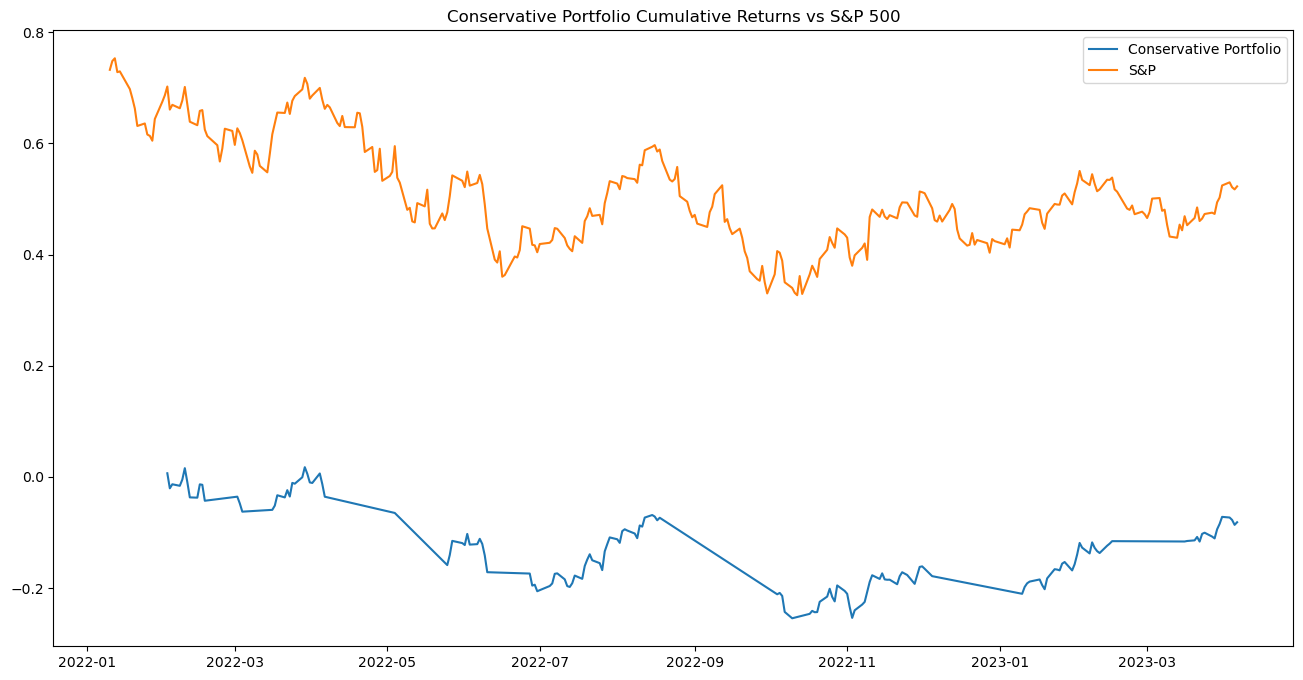

In [119]:
fig0

In [42]:
market = pd.read_csv(Path(f"./data/at_market_data.csv"),
                     parse_dates=True,
                     infer_datetime_format=True)

In [43]:
market

,index,open,high,low,close,adjclose,volume,market_daily_returns,market_cum_returns
0,2022-01-10,4655.339844,4673.020020,4582.240234,4670.290039,4670.290039,4511810000,-0.001441,0.732425
1,2022-01-11,4669.140137,4714.129883,4638.270020,4713.069824,4713.069824,4101590000,0.009160,0.748294
2,2022-01-12,4728.589844,4748.830078,4706.709961,4726.350098,4726.350098,4048220000,0.002818,0.753221
3,2022-01-13,4733.560059,4744.129883,4650.290039,4659.029785,4659.029785,4251730000,-0.014244,0.728249
4,2022-01-14,4637.990234,4665.129883,4614.750000,4662.850098,4662.850098,4338490000,0.000820,0.729666
...,...,...,...,...,...,...,...,...,...
307,2023-03-31,4056.179932,4110.750000,4056.179932,4109.310059,4109.310059,4525120000,0.014437,0.524332
308,2023-04-03,4102.200195,4127.660156,4098.790039,4124.509766,4124.509766,4234700000,0.003699,0.529970
309,2023-04-04,4128.029785,4133.129883,4086.870117,4100.600098,4100.600098,4227800000,-0.005797,0.521101
310,2023-04-05,4094.500000,4099.689941,4072.560059,4090.379883,4090.379883,3968020000,-0.002492,0.517310


In [4]:
classes = ['conservative', 'balanced', 'growth', 'aggressive', 'alternative']
strategies_list = {'conservative': ['sma', 'rsi', 'macd'],
              'balanced': ['sma', 'rsi', 'macd'],
              'growth': ['sma', 'rsi', 'macd'],
              'aggressive': ['sma', 'rsi', 'macd'],
              'alternative': ['sma', 'rsi', 'macd']
             }


for c in classes:
    start_date = af.default_test_start_date
    df, ml = af.build_portfolio_signal_ml_df(c, 2021, 6, 1)
    
    strategies = strategies_list[c]
    for s in strategies:
        ind = s.upper() + '_signal'
        performance = af.create_portfolio_performance_data(df, ind, 100000, 500)
        performance = performance[['close', ind, 'Position', 'Entry/Exit Position', 'Portfolio Holdings', 'Portfolio Cash',
                                  'Portfolio Total', 'Portfolio Daily Returns', 'Portfolio Cumulative Returns']].loc[start_date:,]
        performance.reset_index(inplace=True)
        file_name = f"performance_data_{s}_{c}.csv"
        file_path = Path(f"./data/{file_name}")
        performance.to_csv(file_path, index=False)
   
        
    

In [12]:
df = pd.read_csv(Path("./data/performance/performance_data_rsi_alternative.csv"),
                 index_col='index', parse_dates=True, infer_datetime_format=True)

In [19]:
def make_chart(portfolio_class, strategy):
    file = f"performance_data_{strategy}_{portfolio_class}.csv"
    df = pd.read_csv(Path(f"./data/performance/{file}"),
                 index_col='index', parse_dates=True, infer_datetime_format=True)
    
    text = f"{portfolio_class.title()} Portfolio"
    title = f"{portfolio_class.title()} Value over Time"
    fig0 = Figure(figsize=(16,8))
    ax = fig0.subplots()
    #ax = port_cum_returns.plot(figsize=(10,5), title="Cumulative Returns of Conservative Portfolio vs S&P 500")
    #gmarket_cum_returns.plot(ax=ax)
    chart = ax.plot(df['Portfolio Total'])
    # ax.plot(market_cum_returns['^GSPC'])
    ax.set_title(title)
    ax.legend([text,
         'S&P'])

    return fig0

In [25]:
np.round(((df.iloc[-1,:]['Portfolio Total'] - 100000) / 100000 * 100),2)

0.34

In [22]:
df.iloc[-1,:]['Portfolio Total']

100343.74904632573

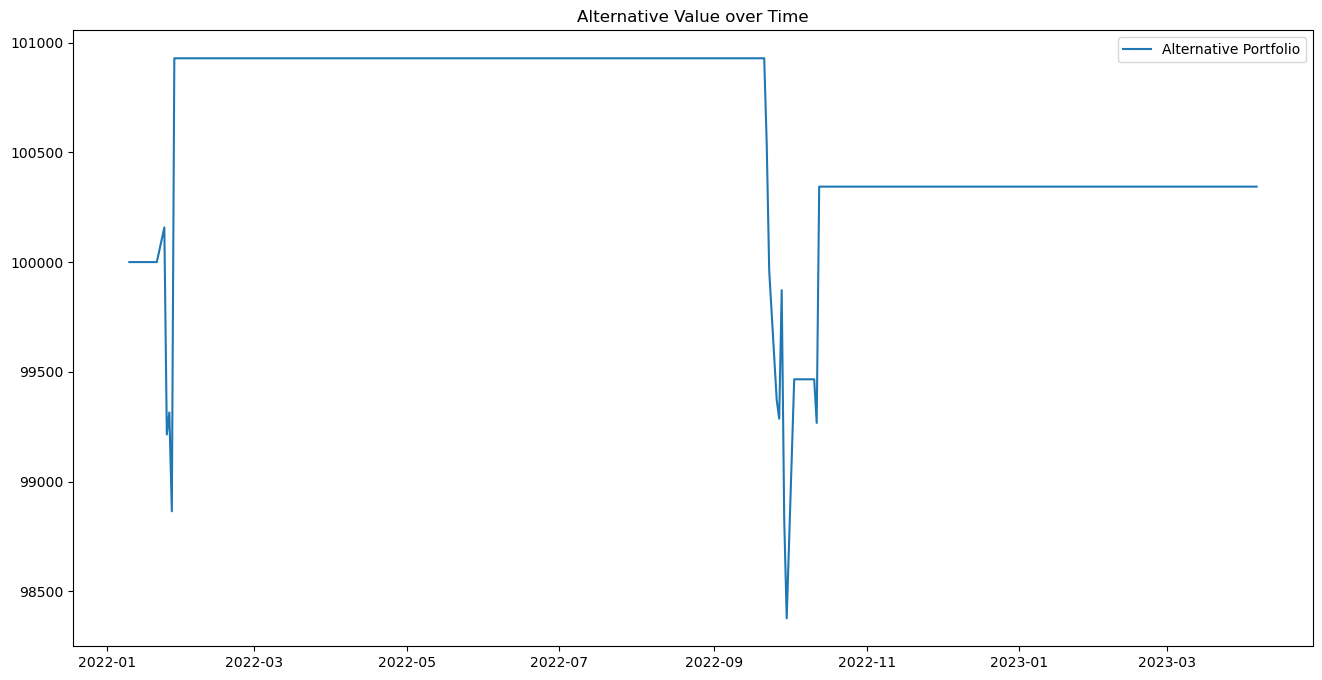

In [21]:
make_chart('alternative', 'rsi')

In [2]:
# use yfinance to pull ticker info. allows for hourly data
def get_stocks2(ticker_list, year=2017, month=12, day=31):

    # start = datetime.datetime(2017, 12, 31)
    start = datetime.datetime(year, month, day)
    historical_datas = {}
    for ticker in ticker_list:
        historical_datas[ticker] = get_data(ticker, start_date = start, interval="1d")

    df = []
    for ticker in ticker_list:
        dfs = historical_datas[ticker].drop('ticker', axis=1)
        df.append(dfs)
    return  pd.concat(df, axis=1, keys=ticker_list).dropna()

In [4]:
# create function to pull combined price information for a single risk-level portfolio
def get_portfolio_summary(name, start_year, start_month, start_day):
    tickers = helpers.get_ticker_by_port_name(name)
    stocks = helpers.get_stocks(tickers, start_year, start_month, start_day)
    weights = helpers.get_weights_by_name(name)
    ticker_data = stocks
    df = pd.DataFrame(np.zeros(stocks[tickers[0]].shape), columns=stocks[tickers[0]].columns, index=stocks[tickers[0]].index)
    for ticker in tickers:
        dfs = ticker_data[ticker]
        weight = weights.loc[ticker,'weight']
        dfs_weighted = dfs * weight
        df = df + dfs_weighted
        
    return df

In [5]:
df = get_portfolio_summary("conservative", 2017, 12, 31)

In [6]:
df.head()

,open,high,low,close,adjclose,volume
2018-08-15,49.566499,49.655999,49.356000,49.514001,44.941556,4375820.0
2018-08-16,49.660999,49.704000,49.480999,49.542000,44.964157,2657540.0
2018-08-17,49.509000,49.638000,49.407000,49.549000,44.970019,2549360.0
2018-08-20,49.595499,49.638000,49.465999,49.541999,44.962072,2736570.0
2018-08-21,49.625999,49.717002,49.531999,49.592000,45.009429,2400040.0


In [8]:
# add indicators to portfolio dataframe
def add_indicators(df):
    MyStrategy = ta.Strategy(
    name="custom",
    ta=[
        {"kind": "sma","length": 30},
        {"kind": "sma","length": 100},
        {"kind": "macd"},
        {"kind": "bbands", "length": 20,"std" : 2},
        {"kind": "rsi"},
        {"kind": "hlc3"},
        {"kind": "ohlc4"},
        {"kind": "linreg"},
        {"kind": "stoch"}
        
    ]
)
    df.ta.strategy(MyStrategy)
    return df

In [9]:
df = add_indicators(df)

In [10]:
df

,open,high,low,close,adjclose,volume,SMA_30,SMA_100,MACD_12_26_9,MACDh_12_26_9,...,BBM_20_2.0,BBU_20_2.0,BBB_20_2.0,BBP_20_2.0,RSI_14,HLC3,OHLC4,LR_14,STOCHk_14_3_3,STOCHd_14_3_3
2018-08-15,49.566499,49.655999,49.356000,49.514001,44.941556,4375820.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,49.508667,49.523125,NaN,NaN,NaN
2018-08-16,49.660999,49.704000,49.480999,49.542000,44.964157,2657540.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,49.575666,49.597000,NaN,NaN,NaN
2018-08-17,49.509000,49.638000,49.407000,49.549000,44.970019,2549360.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,49.531333,49.525750,NaN,NaN,NaN
2018-08-20,49.595499,49.638000,49.465999,49.541999,44.962072,2736570.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,49.548666,49.560374,NaN,NaN,NaN
2018-08-21,49.625999,49.717002,49.531999,49.592000,45.009429,2400040.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,49.613667,49.616750,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-29,62.036002,62.443001,61.947001,62.269000,62.225869,3264470.0,60.289134,58.788742,0.699343,0.116783,...,60.744500,63.026815,7.514474,0.833981,65.827985,62.219667,62.173751,62.374532,79.565322,81.385284
2023-03-30,62.498999,62.683999,62.284001,62.597001,62.553914,2644460.0,60.349767,58.862872,0.735721,0.122529,...,60.928250,63.185673,7.410101,0.869614,68.019816,62.521667,62.516000,62.437222,86.749914,82.022033
2023-03-31,62.564499,63.202998,62.499998,63.144998,63.101796,2914240.0,60.448334,58.937388,0.799553,0.149089,...,61.105700,63.471671,7.743862,0.930964,71.328621,62.949331,62.853123,62.618279,95.058440,87.124558
2023-04-03,62.863999,63.174999,62.645000,63.086001,63.086001,5312600.0,60.553500,59.008498,0.835746,0.148225,...,61.272000,63.702912,7.934820,0.873111,70.483127,62.968667,62.942500,62.763611,97.378620,93.062325


In [12]:
# add signals to portfolio dataframe
def add_signals(df):
    # add columns for daily returns and use those to populate a column
    # indicating buy/sell/hold based on daily performance
    df.ta.log_return(cumulative=True, append=True)
    df.ta.log_return(cumulative=False, append=True)
    df.ta.percent_return(append=True, cumulative=True)
    df.ta.percent_return(append=True, cumulative=False)
    df['performance_signal'] = 0
    df['SMA_signal'] = 0
    df['MACD_signal'] = 0
    df['BB_signal'] = 0
    sma_position = 0
    macd_position = 0
    bb_position = 0
    for index, row in df.iterrows():
        if row['PCTRET_1'] > 0:
            df.loc[index,'performance_signal'] = 1
        elif row['PCTRET_1'] < 0:
            df.loc[index,'performance_signal'] = -1
    
        # create signal column based upon SMA 
        if row['SMA_30'] > row['SMA_100'] and sma_position != 1:
            df.loc[index,'SMA_signal'] = 1
            sma_position = 1
        elif row['SMA_30'] < row['SMA_100'] and sma_position != -1:
            df.loc[index,'SMA_signal'] = -1
            sma_position = -1
            
        # create signal column based upon MACD
        if row['MACD_12_26_9'] > row['MACDs_12_26_9'] and macd_position != 1:
            df.loc[index,'MACD_signal'] = 1
            macd_position = 1
        if row['MACD_12_26_9'] < row['MACDs_12_26_9'] and macd_position != -1:
            df.loc[index,'MACD_signal'] = -1
            macd_position = -1
            
        # create signal column based upon Bollinger Bands
        if row['close'] <  row['BBL_20_2.0'] and bb_position != 1:
            df.loc[index,'BB_signal'] = 1
            bb_position = 1
        if row['close'] >  row['BBU_20_2.0'] and bb_position != -1:
            df.loc[index,'BB_signal'] = -1
            bb_position = -1
    
    return df   


In [13]:
df = add_signals(df)
df

,open,high,low,close,adjclose,volume,SMA_30,SMA_100,MACD_12_26_9,MACDh_12_26_9,...,STOCHk_14_3_3,STOCHd_14_3_3,CUMLOGRET_1,LOGRET_1,CUMPCTRET_1,PCTRET_1,performance_signal,SMA_signal,MACD_signal,BB_signal
2018-08-15,49.566499,49.655999,49.356000,49.514001,44.941556,4375820.0,NaN,NaN,NaN,NaN,...,NaN,NaN,0.000000,NaN,0.000000,NaN,0,0,0,0
2018-08-16,49.660999,49.704000,49.480999,49.542000,44.964157,2657540.0,NaN,NaN,NaN,NaN,...,NaN,NaN,0.000565,0.000565,0.000565,0.000565,1,0,0,0
2018-08-17,49.509000,49.638000,49.407000,49.549000,44.970019,2549360.0,NaN,NaN,NaN,NaN,...,NaN,NaN,0.000707,0.000141,0.000707,0.000141,1,0,0,0
2018-08-20,49.595499,49.638000,49.465999,49.541999,44.962072,2736570.0,NaN,NaN,NaN,NaN,...,NaN,NaN,0.000565,-0.000141,0.000565,-0.000141,-1,0,0,0
2018-08-21,49.625999,49.717002,49.531999,49.592000,45.009429,2400040.0,NaN,NaN,NaN,NaN,...,NaN,NaN,0.001574,0.001009,0.001575,0.001009,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-29,62.036002,62.443001,61.947001,62.269000,62.225869,3264470.0,60.289134,58.788742,0.699343,0.116783,...,79.565322,81.385284,0.229208,0.009763,0.257604,0.009811,1,0,0,0
2023-03-30,62.498999,62.683999,62.284001,62.597001,62.553914,2644460.0,60.349767,58.862872,0.735721,0.122529,...,86.749914,82.022033,0.234462,0.005254,0.264228,0.005267,1,0,0,0
2023-03-31,62.564499,63.202998,62.499998,63.144998,63.101796,2914240.0,60.448334,58.937388,0.799553,0.149089,...,95.058440,87.124558,0.243178,0.008716,0.275296,0.008754,1,0,0,0
2023-04-03,62.863999,63.174999,62.645000,63.086001,63.086001,5312600.0,60.553500,59.008498,0.835746,0.148225,...,97.378620,93.062325,0.242243,-0.000935,0.274104,-0.000934,-1,0,0,0


In [10]:
# build data to feed to ML model for daily predictions
def build_ml_prediction_data(name, year, month, day):
    df = get_portfolio_summary(name, year - 1, month, day)
    df.ta.log_return(cumulative=True, append=True)
    df.ta.log_return(cumulative=False, append=True)
    df.ta.percent_return(append=True, cumulative=True)
    df.ta.percent_return(append=True, cumulative=False)
    df = add_indicators(df)
    df = df.dropna()
    df['performance_signal'] = 0
    for index, row in df.iterrows():
        if row['PCTRET_1'] > 0:
            df.loc[index,'performance_signal'] = 1
        elif row['PCTRET_1'] < 0:
            df.loc[index,'performance_signal'] = -1
    df = df.drop(['open', 'high', 'low', 'close', 'adjclose', 'volume','CUMLOGRET_1','LOGRET_1', 'CUMPCTRET_1', 'PCTRET_1'], axis=1)
    start = str(datetime.datetime(year, month, day).date())
    return df.loc[start:,]

In [11]:
# build dataframe showing Bollinger Bands, SMA and MACD signals and 
# dataframe used for training ML models
def build_portfolio_signal_ml_df(name, start_year, start_month, start_day):
    summary = get_portfolio_summary(name, start_year, start_month, start_day)
    indicators = add_indicators(summary)
    signals = add_signals(indicators)
    signals = signals.dropna()
    ml = signals.drop(['open', 'high', 'low', 'close', 'adjclose', 'volume', 'SMA_signal', 'MACD_signal',
                       'BB_signal', 'CUMLOGRET_1','LOGRET_1', 'CUMPCTRET_1', 'PCTRET_1'], axis=1)
    
    return signals, ml.dropna()

In [12]:
aggressive_df, aggressive_ml = build_portfolio_signal_ml_df("aggressive", 2017,12,31)

In [13]:
aggressive_df

,open,high,low,close,adjclose,volume,SMA_30,SMA_100,MACD_12_26_9,MACDh_12_26_9,...,STOCHk_14_3_3,STOCHd_14_3_3,CUMLOGRET_1,LOGRET_1,CUMPCTRET_1,PCTRET_1,performance_signal,SMA_signal,MACD_signal,BB_signal
2018-05-24,61.115250,61.302002,60.575499,61.176502,58.085946,8228640.0,59.968742,59.684815,0.553461,0.004227,...,70.889562,73.034386,0.028859,-0.000956,0.029279,-0.000955,-1,1,0,0
2018-05-25,61.180999,61.309500,60.935501,61.099500,58.009732,6748560.0,60.046092,59.701448,0.529843,-0.015513,...,66.121126,70.963423,0.027599,-0.001259,0.027984,-0.001259,-1,0,-1,0
2018-05-29,60.909251,61.232502,60.467502,60.856002,57.778121,20881665.0,60.104742,59.711957,0.485876,-0.047584,...,51.386464,62.799051,0.023606,-0.003993,0.023887,-0.003985,-1,0,0,0
2018-05-30,61.123501,61.369501,60.898998,61.232998,58.136728,7305675.0,60.150075,59.724928,0.475966,-0.045995,...,48.953553,55.487048,0.029782,0.006176,0.030230,0.006195,1,0,0,0
2018-05-31,61.257498,61.628001,61.085998,61.280501,58.183497,11113445.0,60.194575,59.731721,0.466566,-0.044316,...,48.709344,49.683121,0.030557,0.000775,0.031029,0.000776,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-29,115.799505,116.963500,115.580500,116.593999,116.583848,5490280.0,111.499634,106.715519,1.657107,0.322399,...,83.266605,82.688247,0.673794,0.018298,0.961665,0.018466,1,0,0,0
2023-03-30,117.606999,118.038498,117.034503,117.832504,117.822347,4248010.0,111.632584,106.933159,1.831761,0.397643,...,89.612902,84.524507,0.684360,0.010566,0.982502,0.010622,1,0,0,0
2023-03-31,117.710248,119.576496,117.571496,119.469496,119.459296,5760155.0,111.879368,107.149573,2.078310,0.515353,...,97.596276,90.158594,0.698157,0.013797,1.010044,0.013893,1,0,0,0
2023-04-03,118.862498,119.565497,118.271997,119.319503,119.319503,7846675.0,112.160934,107.351203,2.235825,0.538295,...,98.223822,95.144334,0.696901,-0.001256,1.007521,-0.001255,-1,0,0,0


In [77]:
conservative_df, conservative_ml = build_portfolio_signal_ml_df("conservative", 2017, 12,31)

In [138]:
display(aggressive_df.shape)
display(conservative_df.shape)

(1222, 24)

(1066, 24)

In [80]:
aggressive_ml.head()

,SMA_30,SMA_100,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,BBL_20_2.0,BBM_20_2.0,BBU_20_2.0,BBB_20_2.0,BBP_20_2.0,performance_signal
2018-05-24,59.968742,59.684815,0.553461,0.004227,0.549234,58.465818,60.447663,62.429508,6.557226,0.683879,-1
2018-05-25,60.046092,59.701448,0.529843,-0.015513,0.545356,58.708426,60.561438,62.414449,6.119444,0.645186,-1
2018-05-29,60.104742,59.711957,0.485876,-0.047584,0.533460,59.058610,60.675263,62.291915,5.328868,0.555899,-1
2018-05-30,60.150075,59.724928,0.475966,-0.045995,0.521961,59.354538,60.787663,62.220787,4.715182,0.655372,1
2018-05-31,60.194575,59.731721,0.466566,-0.044316,0.510882,59.772744,60.909238,62.045732,3.731762,0.663337,1


In [134]:
aggressive_ml.head()

2018-05-24   -1.0
2018-05-25   -1.0
2018-05-29    1.0
2018-05-30    1.0
2018-05-31    1.0
Name: performance_signal, dtype: float64

In [127]:
ml = build_ml_prediction_data('aggressive', 2023, 3, 30)

In [128]:
ml

,SMA_30,SMA_100,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,BBL_20_2.0,BBM_20_2.0,BBU_20_2.0,BBB_20_2.0,BBP_20_2.0,performance_signal
2023-03-30,111.632584,106.933159,1.831761,0.397643,1.434118,107.499729,112.869801,118.239873,9.515516,0.962070,1
2023-03-31,111.879368,107.149573,2.078310,0.515353,1.562956,107.284856,113.294301,119.303745,10.608555,1.013791,1


In [108]:
print(datetime.datetime(2023, 3, 30).date())

2023-03-30


In [118]:
start = str(datetime.datetime(2023, 3, 31).date())
ml.loc[start:,]

,SMA_30,SMA_100,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,BBL_20_2.0,BBM_20_2.0,BBU_20_2.0,BBB_20_2.0,BBP_20_2.0,performance_signal
2023-03-31,111.879368,107.149573,2.07831,0.515353,1.562956,107.284856,113.294301,119.303745,10.608555,1.013791,1


In [111]:
ml.tail()

,SMA_30,SMA_100,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,BBL_20_2.0,BBM_20_2.0,BBU_20_2.0,BBB_20_2.0,BBP_20_2.0,performance_signal
2023-03-27,111.332118,106.407149,1.574740,0.391151,1.183589,106.456709,111.678551,116.900394,9.351558,0.808555,-1
2023-03-28,111.388568,106.535579,1.536183,0.282075,1.254108,106.848677,111.981551,117.114425,9.167356,0.743377,-1
2023-03-29,111.499634,106.715519,1.657106,0.322399,1.334707,107.295422,112.422451,117.549480,9.121006,0.906819,1
2023-03-30,111.632584,106.933159,1.831761,0.397643,1.434118,107.499729,112.869801,118.239873,9.515516,0.962070,1
2023-03-31,111.879368,107.149573,2.078310,0.515353,1.562956,107.284856,113.294301,119.303745,10.608555,1.013791,1


In [65]:
aggressive_df[aggressive_df['bb_signal'] != 0]

,open,high,low,close,adjclose,volume,SMA_30,SMA_100,MACD_12_26_9,MACDh_12_26_9,...,BBB_20_2.0,BBP_20_2.0,CUMLOGRET_1,LOGRET_1,CUMPCTRET_1,PCTRET_1,performance_signal,SMA_signal,MACD_signal,BB_signal
2018-06-25,60.995752,61.249002,59.839001,60.292501,57.400454,13269040.0,61.702992,59.996028,0.122152,-0.277810,...,4.360696,-0.135684,0.014304,-0.018560,0.014406,-0.018389,-1,0,0,1
2018-08-27,63.834000,64.102000,63.660002,64.067499,60.990688,5961445.0,62.753983,61.289703,0.301573,0.088686,...,3.530920,1.098677,0.075033,0.008071,0.077920,0.008104,1,0,0,-1
2018-10-08,62.567498,62.852500,61.648499,62.345501,59.535402,14224325.0,63.727917,62.549108,-0.006504,-0.165277,...,3.253240,-0.137019,0.047787,-0.007693,0.048947,-0.007664,-1,0,0,1
2019-02-04,57.261502,57.980000,57.207499,57.958998,55.548694,5492320.0,54.827692,58.340738,0.578813,0.287628,...,7.104925,1.051673,-0.025168,0.012911,-0.024854,0.012995,1,0,0,-1
2019-05-13,63.177999,63.611501,62.433499,62.707498,60.310317,20028790.0,64.956341,59.981732,0.128462,-0.451143,...,5.395299,-0.252460,0.053577,-0.028153,0.055038,-0.027761,-1,0,0,1
2019-09-05,68.617498,69.284501,68.481503,68.966500,66.558035,7292850.0,67.314333,66.189447,0.105561,0.211330,...,4.964217,1.084200,0.148717,0.015150,0.160344,0.015266,1,0,0,-1
2019-10-02,66.894500,66.938498,65.711501,66.179499,64.032020,14179660.0,67.793640,66.687792,-0.139373,-0.229009,...,4.099799,-0.210700,0.107466,-0.016240,0.113454,-0.016108,-1,0,0,1
2019-10-25,68.673500,69.701998,68.602498,69.595999,67.337600,6993840.0,68.008823,67.542042,0.247636,0.110027,...,4.797953,1.008984,0.157803,0.014065,0.170935,0.014164,1,0,0,-1
2020-02-25,78.788601,79.078001,75.630502,75.882249,73.631683,23310835.0,80.223740,74.383275,0.452184,-0.736132,...,10.045763,-0.118569,0.244279,-0.030451,0.276700,-0.029992,-1,0,0,1
2020-05-07,76.212549,76.902502,76.099500,76.467753,74.538020,9500260.0,70.732367,74.026681,1.588604,0.364720,...,10.111982,1.015485,0.251965,0.015668,0.286551,0.015791,1,0,0,-1


:Overlay
   .Curve.I          :Curve   [index]   (close)
   .NdOverlay.I      :NdOverlay   [Variable]
      :Curve   [index]   (value)
   .Scatter.Close.I  :Scatter   [index]   (close)
   .Scatter.Close.II :Scatter   [index]   (close)
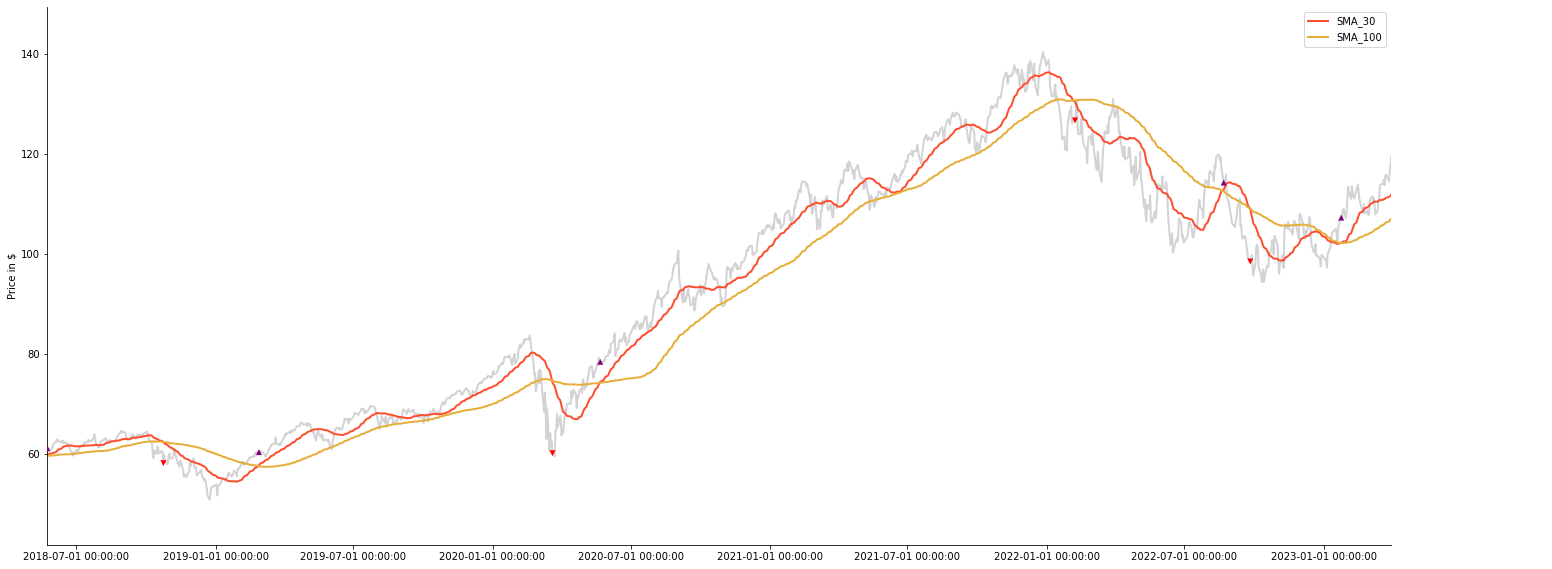

In [57]:
# plot SMA indicators

exit = aggressive_df[aggressive_df['SMA_signal'] == -1]['close'].hvplot.scatter(
    color='red',
    marker = 'v',
    legend=False,
    ylabel='Price in $',
    width=2000,
    height=800)

# Show the plot
exit

entry = aggressive_df[aggressive_df['SMA_signal'] == 1]['close'].hvplot.scatter(
    color='purple',
    marker = '^',
    legend=False,
    ylabel='Price in $',
    width=2000,
    height=800)
entry

security_close = aggressive_df[['close']].hvplot(
    color='lightgray',
    ylabel='Price in $',
    width=2000,
    height=800)
security_close

moving_avgs = aggressive_df[['SMA_30', 'SMA_100']].hvplot(
    ylabel='Price in $',
    width=2000,
    height=800)

moving_avgs

entry_exit_plot = security_close * moving_avgs * entry * exit

entry_exit_plot

:Overlay
   .Curve.I          :Curve   [index]   (close)
   .Scatter.Close.I  :Scatter   [index]   (close)
   .Scatter.Close.II :Scatter   [index]   (close)
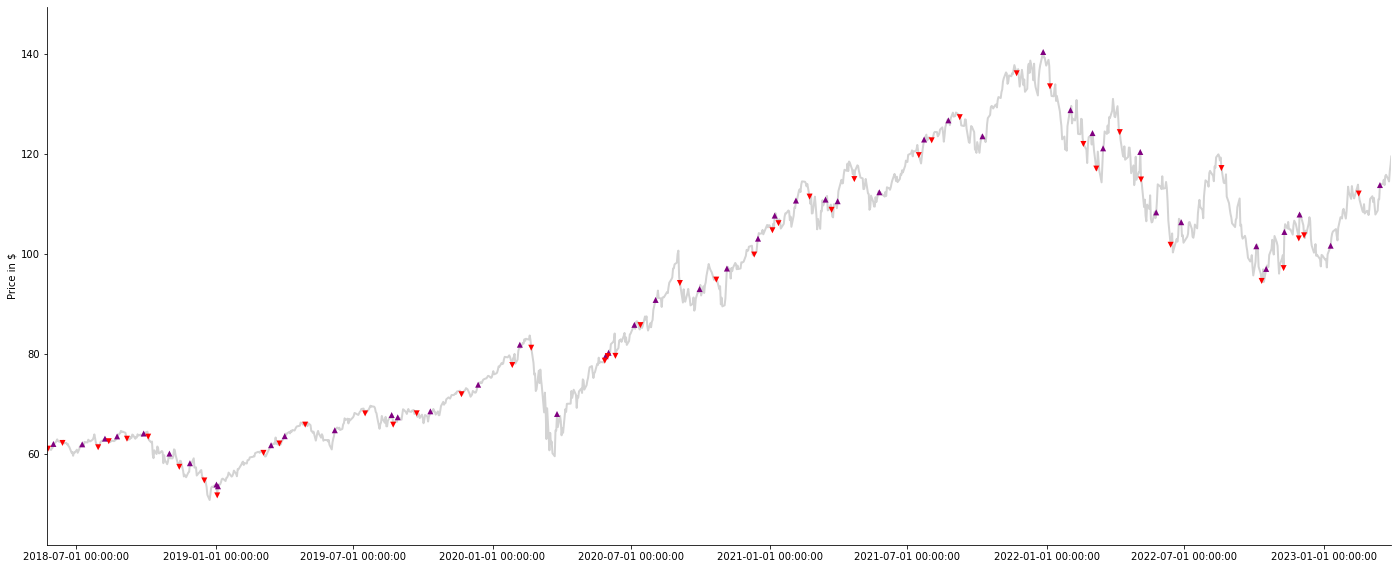

:NdOverlay   [Variable]
   :Curve   [index]   (value)
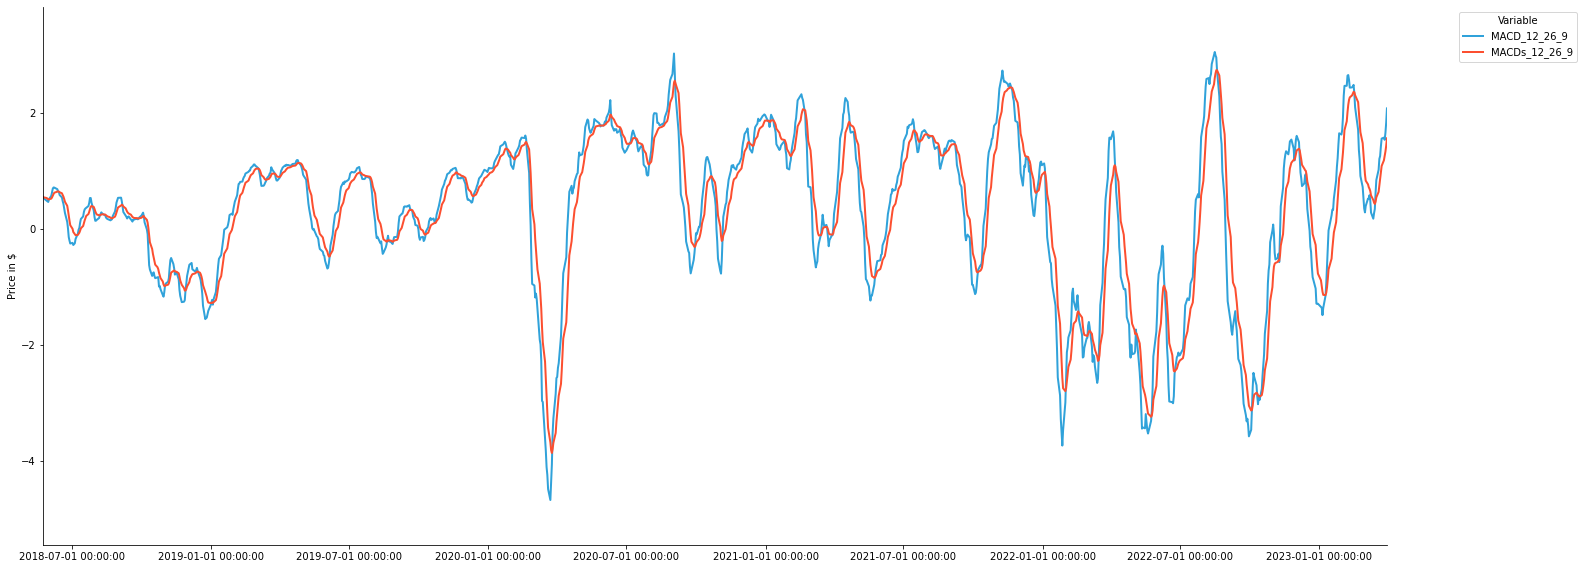

In [69]:
# plot MACD indicators

exit = aggressive_df[aggressive_df['MACD_signal'] == -1]['close'].hvplot.scatter(
    color='red',
    marker = 'v',
    legend=False,
    ylabel='Price in $',
    width=2000,
    height=800)

# Show the plot
exit

entry = aggressive_df[aggressive_df['MACD_signal'] == 1]['close'].hvplot.scatter(
    color='purple',
    marker = '^',
    legend=False,
    ylabel='Price in $',
    width=2000,
    height=800)
entry

security_close = aggressive_df[['close']].hvplot(
    color='lightgray',
    ylabel='Price in $',
    width=2000,
    height=800)
security_close

moving_avgs = aggressive_df[['MACD_12_26_9', 'MACDs_12_26_9']].hvplot(
    ylabel='Price in $',
    width=2000,
    height=800)

moving_avgs

entry_exit_plot = security_close * entry * exit

display(entry_exit_plot)
display(moving_avgs)

:Overlay
   .Curve.I          :Curve   [index]   (close)
   .NdOverlay.I      :NdOverlay   [Variable]
      :Curve   [index]   (value)
   .Scatter.Close.I  :Scatter   [index]   (close)
   .Scatter.Close.II :Scatter   [index]   (close)
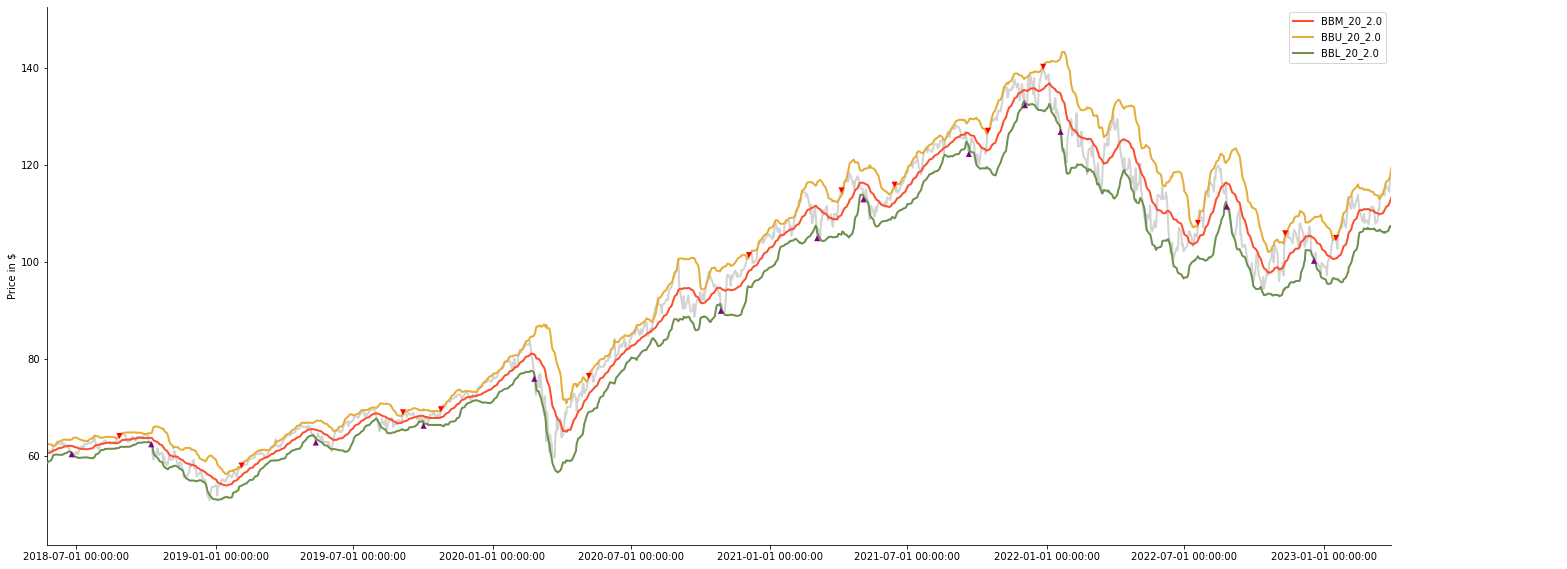

In [70]:
# plot Bollinger Band indicators

exit = aggressive_df[aggressive_df['BB_signal'] == -1]['close'].hvplot.scatter(
    color='red',
    marker = 'v',
    legend=False,
    ylabel='Price in $',
    width=2000,
    height=800)

# Show the plot
exit

entry = aggressive_df[aggressive_df['BB_signal'] == 1]['close'].hvplot.scatter(
    color='purple',
    marker = '^',
    legend=False,
    ylabel='Price in $',
    width=2000,
    height=800)
entry

security_close = aggressive_df[['close']].hvplot(
    color='lightgray',
    ylabel='Price in $',
    width=2000,
    height=800)
security_close

moving_avgs = aggressive_df[['BBM_20_2.0', 'BBU_20_2.0','BBL_20_2.0']].hvplot(
    ylabel='Price in $',
    width=2000,
    height=800)

moving_avgs

entry_exit_plot = security_close * moving_avgs * entry * exit

entry_exit_plot

In [37]:
df2 = add_indicators(conservative_df)

In [41]:
df_signals = add_signals(df2)

In [71]:
df_signals.dropna()

NameError: name 'df_signals' is not defined

In [15]:
conservative_df

,open,high,low,close,adjclose,volume
2018-08-15,49.566499,49.655999,49.356000,49.514001,44.984309,4375820.0
2018-08-16,49.660999,49.704000,49.480999,49.542000,45.006936,2657540.0
2018-08-17,49.509000,49.638000,49.407000,49.549000,45.012801,2549360.0
2018-08-20,49.595499,49.638000,49.465999,49.541999,45.004860,2736570.0
2018-08-21,49.625999,49.717002,49.531999,49.592000,45.052251,2400040.0
...,...,...,...,...,...,...
2023-03-27,62.084997,62.304998,61.661001,61.764000,61.764000,2888370.0
2023-03-28,61.707001,61.826000,61.313002,61.663999,61.663999,2359500.0
2023-03-29,62.036002,62.443001,61.947001,62.269000,62.269000,3264470.0
2023-03-30,62.498999,62.683999,62.284001,62.597001,62.597001,2644460.0


In [2]:
# getting ticker list and weights for each of the risk levels
tickers_conservative = helpers.get_tickers(12)
weights_conservative = helpers.get_weights(12)

tickers_balanced = helpers.get_tickers(20)
weights_balanced = helpers.get_weights(20)

tickers_growth = helpers.get_tickers(28)
weights_growth = helpers.get_weights(28)

tickers_aggressive = helpers.get_tickers(34)
weights_aggressive = helpers.get_weights(34)

tickers_alternative = helpers.get_tickers(40)
weights_alternative = helpers.get_weights(40)


In [3]:
stocks_conservative = helpers.get_stocks(tickers_conservative)
stocks_balanced = helpers.get_stocks(tickers_balanced)
stocks_growth = helpers.get_stocks(tickers_growth)
stocks_aggressive = helpers.get_stocks(tickers_aggressive)
stocks_alternative = helpers.get_stocks(tickers_alternative)

In [5]:
# # create function to pull combined portfolio for a single risk level
# def get_portfolio_summary(stocks, weights):
#     ticker_list = list(stocks.columns.levels[0])
#     ticker_data = stocks
#     df = pd.DataFrame(np.zeros(stocks[ticker_list[0]].shape), columns=stocks[ticker_list[0]].columns, index=stocks[ticker_list[0]].index)
#     for ticker in ticker_list:
#         dfs = ticker_data[ticker]
#         weight = weights.loc[ticker,'weight']
#         dfs_weighted = dfs * weight
#         df = df + dfs_weighted
        
#     return df
    
    

In [6]:
portfolio_conservative = get_portfolio_summary(stocks_conservative, weights_conservative)
portfolio_balanced = get_portfolio_summary(stocks_balanced, weights_balanced)
portfolio_growth = get_portfolio_summary(stocks_growth, weights_growth)
portfolio_aggressive = get_portfolio_summary(stocks_aggressive, weights_aggressive)
portfolio_alternative = get_portfolio_summary(stocks_alternative, weights_alternative)

In [7]:
# df.ta.log_return(cumulative=True, append=True)
# df.ta.log_return(cumulative=False, append=True)
# df.ta.percent_return(append=True, cumulative=True)
# df.ta.percent_return(append=True, cumulative=False)

In [8]:
# add portfolio return information and create buy/sell/hold signal
def add_signals(df):
    df.ta.log_return(cumulative=True, append=True)
    df.ta.log_return(cumulative=False, append=True)
    df.ta.percent_return(append=True, cumulative=True)
    df.ta.percent_return(append=True, cumulative=False)
    df['signal'] = 0
    for index, row in df.iterrows():
        if row['PCTRET_1'] > 0:
            df.loc[index,'signal'] = 1
        elif row['PCTRET_1'] < 0:
            df.loc[index,'signal'] = -1
    
    
    return df

In [9]:
newdf = add_signals(portfolio_conservative)
newdf

,open,high,low,close,adjclose,volume,CUMLOGRET_1,LOGRET_1,CUMPCTRET_1,PCTRET_1,signal
2018-08-15,49.566499,49.655999,49.356000,49.514001,44.984306,4375820.0,0.000000,NaN,0.000000,NaN,0
2018-08-16,49.660999,49.704000,49.480999,49.542000,45.006936,2657540.0,0.000565,0.000565,0.000565,0.000565,1
2018-08-17,49.509000,49.638000,49.407000,49.549000,45.012809,2549360.0,0.000707,0.000141,0.000707,0.000141,1
2018-08-20,49.595499,49.638000,49.465999,49.541999,45.004857,2736570.0,0.000565,-0.000141,0.000565,-0.000141,-1
2018-08-21,49.625999,49.717002,49.531999,49.592000,45.052256,2400040.0,0.001574,0.001009,0.001575,0.001009,1
...,...,...,...,...,...,...,...,...,...,...,...
2023-03-27,62.084997,62.304998,61.661001,61.764000,61.764000,2888370.0,0.221065,-0.008480,0.247405,-0.008444,-1
2023-03-28,61.707001,61.826000,61.313002,61.663999,61.663999,2359500.0,0.219445,-0.001620,0.245385,-0.001619,-1
2023-03-29,62.036002,62.443001,61.947001,62.269000,62.269000,3264470.0,0.229208,0.009763,0.257604,0.009811,1
2023-03-30,62.498999,62.683999,62.284001,62.597001,62.597001,2644460.0,0.234462,0.005254,0.264228,0.005267,1


In [10]:
def add_indicators(df):
    MyStrategy = ta.Strategy(
    name="custom",
    ta=[
        {"kind": "sma","length": 30},
        {"kind": "sma","length": 100},
        {"kind": "macd"},
        {"kind": "bbands", "length": 20,"std" : 2}
        
    ]
)
    df.ta.strategy(MyStrategy)
    return df

In [11]:
newdf

,open,high,low,close,adjclose,volume,CUMLOGRET_1,LOGRET_1,CUMPCTRET_1,PCTRET_1,signal
2018-08-15,49.566499,49.655999,49.356000,49.514001,44.984306,4375820.0,0.000000,NaN,0.000000,NaN,0
2018-08-16,49.660999,49.704000,49.480999,49.542000,45.006936,2657540.0,0.000565,0.000565,0.000565,0.000565,1
2018-08-17,49.509000,49.638000,49.407000,49.549000,45.012809,2549360.0,0.000707,0.000141,0.000707,0.000141,1
2018-08-20,49.595499,49.638000,49.465999,49.541999,45.004857,2736570.0,0.000565,-0.000141,0.000565,-0.000141,-1
2018-08-21,49.625999,49.717002,49.531999,49.592000,45.052256,2400040.0,0.001574,0.001009,0.001575,0.001009,1
...,...,...,...,...,...,...,...,...,...,...,...
2023-03-27,62.084997,62.304998,61.661001,61.764000,61.764000,2888370.0,0.221065,-0.008480,0.247405,-0.008444,-1
2023-03-28,61.707001,61.826000,61.313002,61.663999,61.663999,2359500.0,0.219445,-0.001620,0.245385,-0.001619,-1
2023-03-29,62.036002,62.443001,61.947001,62.269000,62.269000,3264470.0,0.229208,0.009763,0.257604,0.009811,1
2023-03-30,62.498999,62.683999,62.284001,62.597001,62.597001,2644460.0,0.234462,0.005254,0.264228,0.005267,1


In [12]:
port_summary = helpers.get_stocks(tickers_conservative)

In [13]:
ticker_list = list(port_summary.columns.levels[0])


In [14]:
ticker_list

['XLK', 'BNDX', 'GBTC', 'AAAU']

In [15]:
# pass a list of portfolio names to recieve the tickers that comprise the portfolio
def get_tickers_by_port_list(portfolios):
    tickers = []
    for port in portfolios:
        res = helpers.get_ticker_by_port_name(port)
        tickers = tickers + res
    
    return list(set(tickers))

In [16]:
ticker_list = get_tickers_by_port_list(['conservative', 'balanced', 'growth', 'aggressive','alternative'])

In [17]:
ticker_list

['GBTC', 'IVV', 'XLK', 'IEI', 'AAAU', 'REZ', 'GSG', 'USCI', 'BNDX']

In [18]:
# convert convert stock dataframe for use in ML models   
def create_ML_dataset(tickers):
    stocks = helpers.get_stocks(tickers)
    combined_df = pd.DataFrame(columns=['open', 'high','low', 'close', 'adjclose', 'volume','ticker'])
    
    for ticker in tickers:
        # df = stocks[ticker]
        df = helpers.get_stocks([ticker])
        df = df[ticker]
        df['ticker'] = ticker
        df = add_signals(df)
        df = add_indicators(df)
        combined_df = pd.concat([combined_df, df])
    combined_df.drop(['open', 'high','low', 'close', 'adjclose', 'volume', 'CUMLOGRET_1','LOGRET_1', 'CUMPCTRET_1', 'PCTRET_1'], axis=1, inplace=True)
    combined_df.set_index('ticker', append=True, inplace=True)
    
    combined_df.sort_index(inplace = True)
    return combined_df.dropna()

    


In [19]:
data = create_ML_dataset(ticker_list)

In [20]:
data

signal      SMA_30     SMA_100  MACD_12_26_9  \
           ticker                                                 
2018-05-24 BNDX       0.0   54.515334   54.339300     -0.047036   
           GBTC       1.0   14.299500   15.650433     -0.386092   
           GSG       -1.0   17.622000   16.860300      0.267434   
           IEI        1.0  119.324334  120.182000     -0.159327   
           IVV       -1.0  270.366001  272.659200      1.804715   
...                   ...         ...         ...           ...   
2023-03-31 IEI        1.0  115.814667  115.908700      0.581943   
           IVV        1.0  398.825335  398.216000      0.881580   
           REZ        1.0   70.708668   71.509800     -1.187895   
           USCI       1.0   53.773000   54.746000     -0.146913   
           XLK        1.0  140.986335  134.634201      2.711623   

                   MACDh_12_26_9  MACDs_12_26_9  BBL_20_2.0  BBM_20_2.0  \
           ticker                                                         
2018-05-24 BNDX        -0.010889      -0.036147   54.264612   54.490000   
           GBTC        -0.300654      -0.085439   12.279337   14.278250   
           GSG          0.002056       0.265378   17.212277   17.782500   
           IEI          0.061126      -0.220453  118.692020  119.184501   
           IVV          0.353502       1.451213  263.894571  271.225000   
...                          ...            ...         ...         ...   
2023-03-31 IEI          0.044037       0.537906  113.532554  116.552501   
           IVV          1.779759      -0.898179  385.827622  397.695003   
           REZ          0.303886      -1.491781   64.727837   69.234501   
           USCI         0.173546      -0.320459   52.155056   53.431000   
           XLK          0.690267       2.021356  134.975401  142.806501   

                   BBU_20_2.0  BBB_20_2.0  BBP_20_2.0  
           ticker                                      
2018-05-24 BNDX     54.715389    0.827265    0.366896  
           GBTC     16.277163   27.999412   -0.009840  
           GSG      18.352723    6.413310    0.752094  
           IEI     119.676981    0.826418    0.769550  
           IVV     278.555429    5.405423    0.740436  
...                       ...         ...         ...  
2023-03-31 IEI     119.572447    5.182123    0.681709  
           IVV     409.562383    5.968081    1.063940  
           REZ      73.741165   13.018550    0.653717  
           USCI     54.706945    4.776046    0.824857  
           XLK     150.637601   10.967428    1.023777  

[10842 rows x 11 columns]

In [8]:
weights_conservative

,weight,category
XLK,0.2,STOCKS
BNDX,0.6,BONDS
GBTC,0.1,CRYPTO
AAAU,0.1,COMMODOTIES


In [10]:
stock_weights = np.array(weights_conservative['weight'].to_list())
stock_weights

array([0.2, 0.6, 0.1, 0.1])

In [7]:
tickers_conservative

['XLK', 'BNDX', 'GBTC', 'AAAU']

In [16]:
xlk_close = stocks_conservative['XLK'][['close']]
bndx_close = stocks_conservative['BNDX'][['close']]
gbtc_close = stocks_conservative['GBTC'][['close']]
aaau_close = stocks_conservative['AAAU'][['close']]

In [15]:
xlk_close

,close
2018-08-15,72.720001
2018-08-16,73.040001
2018-08-17,73.150002
2018-08-20,73.040001
2018-08-21,73.160004
...,...
2023-03-27,144.830002
2023-03-28,144.149994
2023-03-29,147.169998
2023-03-30,148.880005


In [24]:
df = pd.concat([xlk_close, bndx_close, gbtc_close, aaau_close], axis=1)

In [26]:
df.head()

,close,close,close,close
2018-08-15,72.720001,54.720001,9.64,11.74
2018-08-16,73.040001,54.750000,9.10,11.74
2018-08-17,73.150002,54.750000,8.87,11.82
2018-08-20,73.040001,54.779999,8.76,11.90
2018-08-21,73.160004,54.799999,8.87,11.93


In [22]:
combined = pd.DataFrame(df.dot(stock_weights)).rename(columns={0: 'close'})

In [27]:
combined.head()

,close
2018-08-15,49.514001
2018-08-16,49.542000
2018-08-17,49.549000
2018-08-20,49.541999
2018-08-21,49.592000


In [29]:
mult = df * stock_weights

In [31]:
mult.sum(axis=1)

2018-08-15    49.514001
2018-08-16    49.542000
2018-08-17    49.549000
2018-08-20    49.541999
2018-08-21    49.592000
                ...    
2023-03-27    61.764000
2023-03-28    61.663999
2023-03-29    62.269000
2023-03-30    62.597001
2023-03-31    63.144998
Length: 1165, dtype: float64

In [41]:
datetime.datetime(2012, 12, 31)

datetime.datetime(2012, 12, 31, 0, 0)

In [153]:
end_date = '2023-03-30'
start_date = datetime.datetime.now() + datetime.timedelta(days=-729)
companies = ['XLK', 'BNDX', 'GBTC', 'AAAU'] 
tickers = yf.Tickers(companies)
tickers_hist = tickers.history(period='max',start = start_date, end=end_date,interval='60m',)
tickers_hist

[*********************100%***********************]  4 of 4 completed


Capital Gains                Close                        \
                             AAAU BNDX  XLK       AAAU       BNDX       GBTC   
Datetime                                                                       
2021-04-05 09:30:00           0.0  0.0  0.0  17.209999  57.084999  51.599998   
2021-04-05 10:30:00           0.0  0.0  0.0  17.230000  57.080002  52.860001   
2021-04-05 11:30:00           0.0  0.0  0.0  17.209999  57.105000  52.775002   
2021-04-05 12:30:00           0.0  0.0  0.0  17.191200  57.084999  52.270000   
2021-04-05 13:30:00           0.0  0.0  0.0  17.179899  57.099998  52.525002   
...                           ...  ...  ...        ...        ...        ...   
2023-03-29 11:30:00           0.0  0.0  0.0  19.459999  48.834999  16.020000   
2023-03-29 12:30:00           0.0  0.0  0.0  19.500000  48.845001  15.970000   
2023-03-29 13:30:00           0.0  0.0  0.0  19.520000  48.855000  15.800000   
2023-03-29 14:30:00           0.0  0.0  0.0  19.475000  48.845001  15.875000   
2023-03-29 15:30:00           0.0  0.0  0.0  19.469999  48.849998  15.870000   

                                Dividends            ...       Open  \
                            XLK      AAAU BNDX GBTC  ...       GBTC   
Datetime                                             ...              
2021-04-05 09:30:00  137.490005       0.0  0.0  0.0  ...  50.299999   
2021-04-05 10:30:00  137.580002       0.0  0.0  0.0  ...  51.610001   
2021-04-05 11:30:00  138.179993       0.0  0.0  0.0  ...  52.860001   
2021-04-05 12:30:00  138.250000       0.0  0.0  0.0  ...  52.779999   
2021-04-05 13:30:00  138.320007       0.0  0.0  0.0  ...  52.299999   
...                         ...       ...  ...  ...  ...        ...   
2023-03-29 11:30:00  146.479996       0.0  0.0  0.0  ...  16.165001   
2023-03-29 12:30:00  146.789993       0.0  0.0  0.0  ...  16.025000   
2023-03-29 13:30:00  146.600006       0.0  0.0  0.0  ...  15.960000   
2023-03-29 14:30:00  147.445007       0.0  0.0  0.0  ...  15.803300   
2023-03-29 15:30:00  147.179993       0.0  0.0  0.0  ...  15.890000   

                                Stock Splits                   Volume  \
                            XLK         AAAU BNDX GBTC  XLK      AAAU   
Datetime                                                                
2021-04-05 09:30:00  136.270004          0.0  0.0  0.0  0.0   55394.0   
2021-04-05 10:30:00  137.500000          0.0  0.0  0.0  0.0   54380.0   
2021-04-05 11:30:00  137.570007          0.0  0.0  0.0  0.0    9574.0   
2021-04-05 12:30:00  138.199997          0.0  0.0  0.0  0.0   75835.0   
2021-04-05 13:30:00  138.259995          0.0  0.0  0.0  0.0   11965.0   
...                         ...          ...  ...  ...  ...       ...   
2023-03-29 11:30:00  146.279999          0.0  0.0  0.0  0.0  220773.0   
2023-03-29 12:30:00  146.479996          0.0  0.0  0.0  0.0  165496.0   
2023-03-29 13:30:00  146.779999          0.0  0.0  0.0  0.0  115137.0   
2023-03-29 14:30:00  146.610001          0.0  0.0  0.0  0.0  180632.0   
2023-03-29 15:30:00  147.440002          0.0  0.0  0.0  0.0  101050.0   

                                                     
                         BNDX       GBTC        XLK  
Datetime                                             
2021-04-05 09:30:00  623227.0        0.0  1292083.0  
2021-04-05 10:30:00  467584.0  2621864.0   759927.0  
2021-04-05 11:30:00  414510.0  1556124.0   729235.0  
2021-04-05 12:30:00  748151.0   975945.0   555144.0  
2021-04-05 13:30:00  411824.0   708557.0   458066.0  
...                       ...        ...        ...  
2023-03-29 11:30:00  282756.0   397937.0   915655.0  
2023-03-29 12:30:00  237462.0   196844.0   417074.0  
2023-03-29 13:30:00  347040.0   269073.0   658668.0  
2023-03-29 14:30:00  334079.0   230333.0  1315233.0  
2023-03-29 15:30:00  233845.0   191375.0  1560200.0  

[3500 rows x 31 columns]

In [229]:
new_df = tickers_hist.stack(level=1).rename_axis(['Date', 'Ticker']).reset_index(level=1)

In [230]:
new_df.head()

,Ticker,Capital Gains,Close,Dividends,High,Low,Open,Stock Splits,Volume
Date,,,,,,,,,
2021-04-05 09:30:00,AAAU,0.0,17.209999,0.0,17.213301,17.150000,17.160000,0.0,55394.0
2021-04-05 09:30:00,BNDX,0.0,57.084999,0.0,57.090000,57.029999,57.070000,0.0,623227.0
2021-04-05 09:30:00,GBTC,NaN,51.599998,0.0,51.610001,50.049999,50.299999,0.0,0.0
2021-04-05 09:30:00,XLK,0.0,137.490005,0.0,137.539993,136.089996,136.270004,0.0,1292083.0
2021-04-05 10:30:00,AAAU,0.0,17.230000,0.0,17.235001,17.170000,17.208200,0.0,54380.0


In [231]:
df_merged = pd.DataFrame(columns=['Ticker', 'Capital Gains', 'Close', 'Dividends', 'High', 'Low', 'Open', 'Stock Splits', 'Volume'])
for company in companies:
    df = new_df[new_df['Ticker'] == company]
    df_merged = pd.concat([df_merged, df], axis=1)


In [232]:
df_merged

,Ticker,Capital Gains,Close,Dividends,High,Low,Open,Stock Splits,Volume,Ticker,...,Volume,Ticker,Capital Gains,Close,Dividends,High,Low,Open,Stock Splits,Volume
2021-04-05 09:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,XLK,...,0.0,AAAU,0.0,17.209999,0.0,17.213301,17.150000,17.160000,0.0,55394.0
2021-04-05 10:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,XLK,...,2621864.0,AAAU,0.0,17.230000,0.0,17.235001,17.170000,17.208200,0.0,54380.0
2021-04-05 11:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,XLK,...,1556124.0,AAAU,0.0,17.209999,0.0,17.250000,17.209999,17.231899,0.0,9574.0
2021-04-05 12:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,XLK,...,975945.0,AAAU,0.0,17.191200,0.0,17.217899,17.190001,17.217899,0.0,75835.0
2021-04-05 13:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,XLK,...,708557.0,AAAU,0.0,17.179899,0.0,17.180000,17.168800,17.178699,0.0,11965.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-29 12:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,XLK,...,196844.0,AAAU,0.0,19.500000,0.0,19.500000,19.464001,19.469101,0.0,165496.0
2023-03-29 13:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,XLK,...,269073.0,AAAU,0.0,19.520000,0.0,19.530001,19.510000,19.510000,0.0,115137.0
2023-03-29 14:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,XLK,...,230333.0,AAAU,0.0,19.475000,0.0,19.525999,19.469999,19.514999,0.0,180632.0
2023-03-29 15:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,XLK,...,191375.0,AAAU,0.0,19.469999,0.0,19.485001,19.450100,19.475000,0.0,101050.0


In [ ]:
datetime.now() + timedelta(days=1,minutes=5) 

In [186]:
columns = pd.MultiIndex.from_arrays([['a1','a1','a2','a2'], ['b1','b2','b3','b4']])
index = pd.MultiIndex.from_tuples([(0,'c1','d1'), (0, 'c2', 'd3')])
df = pd.DataFrame(np.arange(1,9).reshape(2,-1), columns=columns, index=index)

In [188]:
df

a1    a2   
        b1 b2 b3 b4
0 c1 d1  1  2  3  4
  c2 d3  5  6  7  8

In [189]:
df.unstack(level=1)#.reorder_levels([2,0,1], axis=1)

a1                  a2               
       b1        b2        b3        b4     
       c1   c2   c1   c2   c1   c2   c1   c2
0 d1  1.0  NaN  2.0  NaN  3.0  NaN  4.0  NaN
  d3  NaN  5.0  NaN  6.0  NaN  7.0  NaN  8.0

In [190]:
df.unstack(level=1).reorder_levels([2,0,1], axis=1)

c1   c2   c1   c2   c1   c2   c1   c2
       a1   a1   a1   a1   a2   a2   a2   a2
       b1   b1   b2   b2   b3   b3   b4   b4
0 d1  1.0  NaN  2.0  NaN  3.0  NaN  4.0  NaN
  d3  NaN  5.0  NaN  6.0  NaN  7.0  NaN  8.0

In [233]:
updated_df = new_df.reset_index().set_index(['Date', 'Ticker'])

In [234]:
updated_df.drop(['Capital Gains', 'Dividends', 'Stock Splits'], axis=1, inplace=True)
reordered_df = updated_df[['Open', 'High', 'Low', 'Close', 'Volume']]

In [241]:
reordered_df

Open        High         Low       Close  \
Date                Ticker                                                   
2021-04-05 09:30:00 AAAU     17.160000   17.213301   17.150000   17.209999   
                    BNDX     57.070000   57.090000   57.029999   57.084999   
                    GBTC     50.299999   51.610001   50.049999   51.599998   
                    XLK     136.270004  137.539993  136.089996  137.490005   
2021-04-05 10:30:00 AAAU     17.208200   17.235001   17.170000   17.230000   
...                                ...         ...         ...         ...   
2023-03-29 14:30:00 XLK     146.610001  147.470001  146.570007  147.445007   
2023-03-29 15:30:00 AAAU     19.475000   19.485001   19.450100   19.469999   
                    BNDX     48.845001   48.849998   48.840000   48.849998   
                    GBTC     15.890000   15.890000   15.790000   15.870000   
                    XLK     147.440002  147.500000  147.024994  147.179993   

                               Volume  
Date                Ticker             
2021-04-05 09:30:00 AAAU      55394.0  
                    BNDX     623227.0  
                    GBTC          0.0  
                    XLK     1292083.0  
2021-04-05 10:30:00 AAAU      54380.0  
...                               ...  
2023-03-29 14:30:00 XLK     1315233.0  
2023-03-29 15:30:00 AAAU     101050.0  
                    BNDX     233845.0  
                    GBTC     191375.0  
                    XLK     1560200.0  

[13996 rows x 5 columns]

In [248]:
final_df = reordered_df.unstack(level=1).reorder_levels([1,0], axis=1).sort_index(axis=1, level='Ticker',sort_remaining=False)

In [249]:
final_df

Ticker                    AAAU                                             \
                          Open       High        Low      Close    Volume   
Date                                                                        
2021-04-05 09:30:00  17.160000  17.213301  17.150000  17.209999   55394.0   
2021-04-05 10:30:00  17.208200  17.235001  17.170000  17.230000   54380.0   
2021-04-05 11:30:00  17.231899  17.250000  17.209999  17.209999    9574.0   
2021-04-05 12:30:00  17.217899  17.217899  17.190001  17.191200   75835.0   
2021-04-05 13:30:00  17.178699  17.180000  17.168800  17.179899   11965.0   
...                        ...        ...        ...        ...       ...   
2023-03-29 11:30:00  19.510000  19.520000  19.450001  19.459999  220773.0   
2023-03-29 12:30:00  19.469101  19.500000  19.464001  19.500000  165496.0   
2023-03-29 13:30:00  19.510000  19.530001  19.510000  19.520000  115137.0   
2023-03-29 14:30:00  19.514999  19.525999  19.469999  19.475000  180632.0   
2023-03-29 15:30:00  19.475000  19.485001  19.450100  19.469999  101050.0   

Ticker                    BNDX                                             \
                          Open       High        Low      Close    Volume   
Date                                                                        
2021-04-05 09:30:00  57.070000  57.090000  57.029999  57.084999  623227.0   
2021-04-05 10:30:00  57.082802  57.090000  57.080002  57.080002  467584.0   
2021-04-05 11:30:00  57.084999  57.119999  57.080002  57.105000  414510.0   
2021-04-05 12:30:00  57.105000  57.110001  57.080002  57.084999  748151.0   
2021-04-05 13:30:00  57.084999  57.099998  57.080002  57.099998  411824.0   
...                        ...        ...        ...        ...       ...   
2023-03-29 11:30:00  48.875000  48.889702  48.821301  48.834999  282756.0   
2023-03-29 12:30:00  48.834999  48.875000  48.830002  48.845001  237462.0   
2023-03-29 13:30:00  48.845001  48.869999  48.840000  48.855000  347040.0   
2023-03-29 14:30:00  48.855000  48.860001  48.830002  48.845001  334079.0   
2023-03-29 15:30:00  48.845001  48.849998  48.840000  48.849998  233845.0   

Ticker                    GBTC                                              \
                          Open       High        Low      Close     Volume   
Date                                                                         
2021-04-05 09:30:00  50.299999  51.610001  50.049999  51.599998        0.0   
2021-04-05 10:30:00  51.610001  52.889999  51.540001  52.860001  2621864.0   
2021-04-05 11:30:00  52.860001  53.000000  52.430000  52.775002  1556124.0   
2021-04-05 12:30:00  52.779999  52.840000  52.029999  52.270000   975945.0   
2021-04-05 13:30:00  52.299999  52.560001  52.040001  52.525002   708557.0   
...                        ...        ...        ...        ...        ...   
2023-03-29 11:30:00  16.165001  16.219999  15.950000  16.020000   397937.0   
2023-03-29 12:30:00  16.025000  16.040001  15.830000  15.970000   196844.0   
2023-03-29 13:30:00  15.960000  15.970000  15.780000  15.800000   269073.0   
2023-03-29 14:30:00  15.803300  15.920000  15.800000  15.875000   230333.0   
2023-03-29 15:30:00  15.890000  15.890000  15.790000  15.870000   191375.0   

Ticker                      XLK                                                 
                           Open        High         Low       Close     Volume  
Date                                                                            
2021-04-05 09:30:00  136.270004  137.539993  136.089996  137.490005  1292083.0  
2021-04-05 10:30:00  137.500000  137.830002  137.369995  137.580002   759927.0  
2021-04-05 11:30:00  137.570007  138.199997  137.539993  138.179993   729235.0  
2021-04-05 12:30:00  138.199997  138.360001  138.139999  138.250000   555144.0  
2021-04-05 13:30:00  138.259995  138.470001  138.125000  138.320007   458066.0  
...                         ...         ...         ...         ...        ...  
2023-03-29 11:30:00 

In [223]:
new_df

Ticker                    AAAU                                             \
                         Close       High        Low       Open    Volume   
Date                                                                        
2021-04-05 09:30:00  17.209999  17.213301  17.150000  17.160000   55394.0   
2021-04-05 10:30:00  17.230000  17.235001  17.170000  17.208200   54380.0   
2021-04-05 11:30:00  17.209999  17.250000  17.209999  17.231899    9574.0   
2021-04-05 12:30:00  17.191200  17.217899  17.190001  17.217899   75835.0   
2021-04-05 13:30:00  17.179899  17.180000  17.168800  17.178699   11965.0   
...                        ...        ...        ...        ...       ...   
2023-03-29 11:30:00  19.459999  19.520000  19.450001  19.510000  220773.0   
2023-03-29 12:30:00  19.500000  19.500000  19.464001  19.469101  165496.0   
2023-03-29 13:30:00  19.520000  19.530001  19.510000  19.510000  115137.0   
2023-03-29 14:30:00  19.475000  19.525999  19.469999  19.514999  180632.0   
2023-03-29 15:30:00  19.469999  19.485001  19.450100  19.475000  101050.0   

Ticker                    BNDX                                             \
                         Close       High        Low       Open    Volume   
Date                                                                        
2021-04-05 09:30:00  57.084999  57.090000  57.029999  57.070000  623227.0   
2021-04-05 10:30:00  57.080002  57.090000  57.080002  57.082802  467584.0   
2021-04-05 11:30:00  57.105000  57.119999  57.080002  57.084999  414510.0   
2021-04-05 12:30:00  57.084999  57.110001  57.080002  57.105000  748151.0   
2021-04-05 13:30:00  57.099998  57.099998  57.080002  57.084999  411824.0   
...                        ...        ...        ...        ...       ...   
2023-03-29 11:30:00  48.834999  48.889702  48.821301  48.875000  282756.0   
2023-03-29 12:30:00  48.845001  48.875000  48.830002  48.834999  237462.0   
2023-03-29 13:30:00  48.855000  48.869999  48.840000  48.845001  347040.0   
2023-03-29 14:30:00  48.845001  48.860001  48.830002  48.855000  334079.0   
2023-03-29 15:30:00  48.849998  48.849998  48.840000  48.845001  233845.0   

Ticker                    GBTC                                              \
                         Close       High        Low       Open     Volume   
Date                                                                         
2021-04-05 09:30:00  51.599998  51.610001  50.049999  50.299999        0.0   
2021-04-05 10:30:00  52.860001  52.889999  51.540001  51.610001  2621864.0   
2021-04-05 11:30:00  52.775002  53.000000  52.430000  52.860001  1556124.0   
2021-04-05 12:30:00  52.270000  52.840000  52.029999  52.779999   975945.0   
2021-04-05 13:30:00  52.525002  52.560001  52.040001  52.299999   708557.0   
...                        ...        ...        ...        ...        ...   
2023-03-29 11:30:00  16.020000  16.219999  15.950000  16.165001   397937.0   
2023-03-29 12:30:00  15.970000  16.040001  15.830000  16.025000   196844.0   
2023-03-29 13:30:00  15.800000  15.970000  15.780000  15.960000   269073.0   
2023-03-29 14:30:00  15.875000  15.920000  15.800000  15.803300   230333.0   
2023-03-29 15:30:00  15.870000  15.890000  15.790000  15.890000   191375.0   

Ticker                      XLK                                                 
                          Close        High         Low        Open     Volume  
Date                                                                            
2021-04-05 09:30:00  137.490005  137.539993  136.089996  136.270004  1292083.0  
2021-04-05 10:30:00  137.580002  137.830002  137.369995  137.500000   759927.0  
2021-04-05 11:30:00  138.179993  138.199997  137.539993  137.570007   729235.0  
2021-04-05 12:30:00  138.250000  138.360001  138.139999  138.199997   555144.0  
2021-04-05 13:30:00  138.320007  138.470001  138.125000  138.259995   458066.0  
...                         ...         ...         ...         ...        ...  
2023-03-29 11:30:00 

In [3]:
signals, ml = af.build_portfolio_signal_ml_df("conservative", 2017, 12,13)

In [4]:
signals.columns

Index(['open', 'high', 'low', 'close', 'adjclose', 'volume', 'SMA_30',
       'SMA_100', 'MACD_12_26_9', 'MACDh_12_26_9', 'MACDs_12_26_9',
       'BBL_20_2.0', 'BBM_20_2.0', 'BBU_20_2.0', 'BBB_20_2.0', 'BBP_20_2.0',
       'RSI_14', 'HLC3', 'OHLC4', 'LR_14', 'STOCHk_14_3_3', 'STOCHd_14_3_3',
       'CUMLOGRET_1', 'LOGRET_1', 'CUMPCTRET_1', 'PCTRET_1',
       'performance_signal', 'SMA_signal', 'MACD_signal', 'BB_signal',
       'RSI_signal'],
      dtype='object')

In [ ]:
df = create_portfolio_performance_data(signals, signal, initial_capital, share_size)

In [26]:
def get_portfolio_summary(name, start_year, start_month, start_day):
    tickers = helpers.get_ticker_by_port_name(name)
    stocks = helpers.get_stocks(tickers, start_year, start_month, start_day)
    weights = helpers.get_weights_by_name(name)
    ticker_data = stocks
    df = pd.DataFrame(np.zeros(stocks[tickers[0]].shape), columns=stocks[tickers[0]].columns, index=stocks[tickers[0]].index)
    for ticker in tickers:
        dfs = ticker_data[ticker]
        weight = weights.loc[ticker,'weight']
        dfs_weighted = dfs * weight
        df = df + dfs_weighted
        
    return df

In [31]:
get_portfolio_summary('alternative', 2000,12,31)

,open,high,low,close,adjclose,volume
2015-05-11,39.787681,39.845181,39.371946,39.431445,33.734581,3067490.0
2015-05-12,39.242957,39.593956,38.945845,39.463392,33.754930,3897995.0
2015-05-13,39.646346,39.827845,39.268345,39.316345,33.653653,4691655.0
2015-05-14,39.585346,40.007347,39.537352,39.965951,34.196581,3727740.0
2015-05-15,40.038951,40.225451,39.849758,40.067759,34.263725,4274595.0
...,...,...,...,...,...,...
2023-03-31,96.338999,97.889998,96.160498,97.813998,97.813998,4163070.0
2023-04-03,97.450998,98.125498,96.883998,97.666501,97.666501,5860305.0
2023-04-04,97.884502,98.148997,96.789003,97.240501,97.240501,4228690.0
2023-04-05,96.903498,97.046497,95.766002,96.420498,96.420498,4167060.0


In [34]:
market = helpers.get_stocks(['^GSPC'])
market = market['^GSPC']
market = market.loc[af.default_test_start_date:,]
market['market_daily_returns'] = market['close'].pct_change()
market.dropna(inplace=True)
market['market_cum_returns'] = (1 + market['market_daily_returns']).cumprod() - 1


In [35]:
market

,open,high,low,close,adjclose,volume,market_daily_returns,market_cum_returns
2022-01-11,4669.140137,4714.129883,4638.270020,4713.069824,4713.069824,4101590000,0.009160,0.009160
2022-01-12,4728.589844,4748.830078,4706.709961,4726.350098,4726.350098,4048220000,0.002818,0.012004
2022-01-13,4733.560059,4744.129883,4650.290039,4659.029785,4659.029785,4251730000,-0.014244,-0.002411
2022-01-14,4637.990234,4665.129883,4614.750000,4662.850098,4662.850098,4338490000,0.000820,-0.001593
2022-01-18,4632.240234,4632.240234,4568.700195,4577.109863,4577.109863,4748700000,-0.018388,-0.019952
...,...,...,...,...,...,...,...,...
2023-03-31,4056.179932,4110.750000,4056.179932,4109.310059,4109.310059,4525120000,0.014437,-0.120117
2023-04-03,4102.200195,4127.660156,4098.790039,4124.509766,4124.509766,4234700000,0.003699,-0.116862
2023-04-04,4128.029785,4133.129883,4086.870117,4100.600098,4100.600098,4227800000,-0.005797,-0.121982
2023-04-05,4094.500000,4099.689941,4072.560059,4090.379883,4090.379883,3968020000,-0.002492,-0.124170
